<a href="https://colab.research.google.com/github/HugoFCamba/MLSentimentInTS/blob/main/Twitter_y_Mercados_FInancieros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Modelización y predicción de series temporales financieras mediante análisis de sentimientos y Machine Learning.**


Trabajo Realizado Por: Hugo Fernández Camba, Diego Moreno Cortés-Cavanillas, Alberto Cañuelo Gómez.



A lo largo de la asignatura Aprendizaje Automático del Doble Grado en Economía - Matemáticas y Estadística, hemos estudiado múltiples modelos para extraer la máxima cantidad de información de un conjunto de datos, con la finalidad de construir herramientas que nos permitan predecir la pertenencia a una clase o el valor de una cierta variable, para una observación inédita. Nuestro primer objetivo, por tanto, es demostrar funcionamiento y utilidad práctica de algunas de las principales familias de modelos.

Además, también deseábamos afianzar el sustancial conocimiento adquirido en lo relativo a métodos y usos en programación. Con esta finalidad, exploramos prácticamente todos los recursos y librerías con los que nos hemos familiarizados a lo largo del curso, así como algunas de las estructuras más notorias, como son los Pipelines.

Sin embargo, nuestra intención con este trabajo no es solamente reforzar y demostrar lo aprendido durante el curso y en las clases, sino emplear dicha experiencia como palanca para adentrarnos en temáticas más complejas en el ámbito de Machine Learning. En primer lugar, deseábamos explorar el estudio de esta disciplina a datos en Series Temporales, que constituyen un volumen masivo de información de enorme riqueza en la economía moderna. En particular, por nuestra formación complementaria como economistas, hemos centrado nuestras atenciones en datos de índole financiera, como son el precio de múltiples activos financieros.

En la mayoría de casos de estudio práctico a lo largo del curso han predominado fuentes de datos puramente cuantitativos, si bien en las clases teóricas sí se ha estudiado la aplicación de Machine Learning, y en particular de Deep Learning, a datos textuales y gráficos. Con el presente trabajo hemos intentado adentrarnos también en los primeros, a través del análisis de sentimientos en titulares de noticias o textos cortos (tweets). El análisis realizado se limita a textos directamente relacionados con los activos financieros que son objeto de nuestro estudio, y emplea métodos estructurados para extraer una medida del 'sentimiento' en torno a los mismos. Dejamos para futuros proyectos el desarrollo de métodos de análisis directo de texto, con herramientas más exhaustivas y customizables, como algoritmos de vectorización, y un sujeto de estudio más amplio, como puedan ser textos, y no solamente titulares, de noticias de múltiples medios y que no se refieran directamente al activo, pero que puedan guardar cualquier relación con el mismo.


# Índice del Trabajo:

1.   Introducción.
      - Metodología
      - Librerías y recursos empleados
      - Datasets
2.   Extracción de información textual.
      - Scrapping: idea y métodos
      - Scrapping en Finviz.
      - Scrapping en Google News
3.   Construcción de nuestra base de datos principal
      - Extracción de información en Twitter.
      - Análisis de Sentimientos: puntuación mediante Vader.
      - Datos financieros: yfinance.
      - Extracción de características financieras.
      - Fusión de variables de sentimiento y financieras.
4.   Exploratory Data Analysis
      - Analisis de los sentimientos.
      - Analisis de variables financieras.
      - Modelización mediante Series Temporales.
5.   Clasificación
      - Adaptación de la base de datos al problema de clasificación.
      - Pipelines: estimación de múltiples modelos
      - Optimización mediante TSCV.
      - Resultados
6.   Regresión
      - Adaptación de la base de datos al problema de regresión.
      - Pipelines: estimación conjunta de modelos.
      - Long-Short Term Memory models.
      - Optimización de mejores modelos y resultados.
7.   Conclusiones: resultados, futuros pasos y aplicaciones.
8.   Fuentes y bibliografía


# Introducción


## Metodología

Siguiendo la estructura del índice anterior, nuestra metodología para el presenta trabajo ha consistidos en lo siguiente. En primer lugar, hemos estudiado con detalle el problema del análisis de sentimientos y las herramientas disponibles para ello en Python. También hemos buscado información relativa al tratamiento de datos de series temporales, a aplicaciones de Machine Learning en finanzas, y naturalmente a la intersección de ambos campos. 

Tras reunir el conocimiento suficiente en cuanto a las herramientas necesarias y óptimas para nuestro problema, nuestra atención se posó sobre la obtención de las bases de datos y de la información necesaria para realizar un análisis básico sobre los mismos que nos sirva para nuestro análisis. Para ello, realizamos un trabajo exhaustivo sobre diversas técnicas de scrapping, con múltiples sujetos de las mismas. Pese a las múltiples complicaciones que se detallan en su momento, en este script se presenta un par de estas técnicas implementadas. Sin embargo, la dimensión y tipología de estos algoritmos no es sufiente a nuestros ojos para llevar a cabo un trabajo de previsión con garantías, por lo que proseguimos a formar una base de datos adecuada mediante la fusión de información financiera y de texto obtenidas por terceros.

Con estos pasos preliminares, empleamos una metodología eminentemente práctica en la implantación del análisis exploratorio y de los modelos fundamentales, muchos de ellos tratados en clase, para clasificación y regresión. Desarrollamos el código originalmente, apoyándonos en los conocimientos de teoría del Aprendizaje Automático, y de prácticas de programación para el mismo. Se resuelven las dudas mediante herramientas de IA y sobre todo haciendo uso de posts en StackOverflow. Realizamos un análisis cualitativo de nuestros resultados, basado en nuestra experiencia previa en este tipo de proyectos, evaluando su validez y utilidad mediante las métricas y algoritmos habituales.


## Librerías y recursos empleados

Como hemos mencionado, para este trabajo hemos empleado un gran número de librerías ya conocidas y aplicadas en clase, pero también hemos explorado nuevos métodos para tareas habituales. Evidentemente, para aquellas acciones relativas a análisis y manejo de textos, series temporales y similares hemos empleado recursos y librerías nuevos para nosotros, que nos permitieran realizar las acciones precisas. 

Algunas de las librerías necesarias con las siguientes:


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import numpy as np
import csv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import math
import time
from datetime import datetime, timedelta
import tensorflow as tf
from tensorflow.keras.layers import GRU, LSTM, Bidirectional, Dense, Flatten, Conv1D, BatchNormalization, LeakyReLU, Dropout
from tensorflow.keras import Sequential
from keras.utils.vis_utils import plot_model
from pickle import load
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit,cross_val_score, train_test_split
from tqdm import tqdm
import statsmodels.api as sm
from math import sqrt
from datetime import datetime, timedelta
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from pickle import dump
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import unicodedata

import warnings
warnings.filterwarnings("ignore")

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr


In [ ]:
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup
import os

# NLTK VADER for sentiment analysis
import nltk
nltk.downloader.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
# Clasificación
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier

## Datasets

La información que vamos a emplear se obtiene en nuestro caso de dos fuentes distintas, en función del tipo de datos. En el caso de los datos financieros, empleamos la librería Yahoo Finance (yfinance) a partir de la cual construímos diversas métricas financieras de utilidad para la predicción de la evolución futura de la acción. 

Para las variables textuales, sin embargo, hemos estudiado un número mucho mayor de posibilidades, fundamentalmente en lo relativo a la obtención mediante scrapping de titulares o tweets. A lo largo de dicho proceso se han dado numerosos problemas debidos fundamentalmente a la deprecación de funciones, a cambios en la estructura de ciertas webs que complican su navegación, a la necesidad de nociones más avanzadas de programación en lenguages web y sobre todo debido a un déficit en nuestras capacidades de poder de computación con las herramientas disponibles. Por ese motivo, y pese a que demostramos algunos de los métodos que nos han resultado menos problemáticos, tomamos la decisión de emplear para el core de nuestro análisis una base de datos de texto de terceros, que nos proporcionase un volumen mayor de información tanto cronológica como entrópicamente. Nos hemos inclinado por la base disponible en:  

https://www.kaggle.com/datasets/omermetinn/tweets-about-the-top-companies-from-2015-to-2020

Nuestra intención original consistía en emplear herramientas de scrapping para obtener una base similar por nuestros propios medios, incorporando también noticias del sector y de la economía general, de modo que pudieramos, en instantes futuros, realizar un análisis con vectorización de textos. Sin embargo, la reciente decisión de Elon Musk de privar de acceso a Twitter a las múltiples APIs externas que servían a este fin nos ha forzado a tomar las decisiones previamente señaladas. 

# Extracción de información textual


##  Scrapping: ideas y métodos

La idea fundamental de los métodos de scrapping es relativamente sencilla: iterar sobre el contenido de una cierta dirección URL para leer, extraer y grabar en un nuevo archivo una serie de entradas repetitivas con la información contenida en dicha web. Sin embargo, en la práctica esta es una tarea compleja, que exige el empleo de algoritmos de manejo de texto sofisticados para identificar las diversas categorías de información, de modo que la información grabada se presente de forma ordenada. Este es uno de los problemas experimentados en nuestra investigación, y que conduce al empleo de una base de datos al uso, no generada por nosotros mismos.

Para obtener esta información, por tanto, es preciso recurrir a algunas librerías especializadas. Algunas de las que empleamos para nuestros ejemplos son: 

from urllib.request import urlopen, Request

from bs4 import BeautifulSoup

import os




## Scrapping en Finwiz.

Para este proceso empleamos las librerías señaladas previamente: urlib.request, bs4 y os.

In [ ]:
finwiz_url = 'https://finviz.com/quote.ashx?t='
news_tables = {}

# tickers = ['AAPL', 'MSFT', 'AMZN', 'META', 'NVDA', 'TSLA'] opción de utilidad para
# nuestros objetivos más realistas de trabajo. 

# A continuación definimos una cierta cartera de acciones con el número de 
# participaciones para una visualización del sentimiento.

tickers_dict = {'AMZN': 5, 'TSLA': 1, 'GOOG': 9, 'META': 3, 'KO': 10, 'PEP': 5, 
                'BA': 5, 'XOM': 5, 'CVX': 4, 'JNJ': 3, 'JPM': 3,'INT': 16,
                'BAC': 5, 'C': 5, 'SPG': 10, 'AAPL': 16, 'MSFT': 5, 'WMT': 7, 
                'LMT': 12, 'PFE': 10, 'MMM': 3, 'CRWD': 3, 'WBD': 10, 'DIS': 8,
                'AIG': 8, 'BRK-B': 14, 'SLB': 16, 'SONY': 5, 'PLD': 5, 
                'AMD': 5} 
                
tickers = tickers_dict.keys()

for ticker in tickers:
    url = finwiz_url + ticker
    req = Request(url=url,headers={'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; WOW64; rv:20.0) Gecko/20100101 Firefox/20.0'}) 
    response = urlopen(req)
    # Read the contents of the file into 'html'
    html = BeautifulSoup(response)
    # Find 'news-table' in the Soup and load it into 'news_table'
    news_table = html.find(id='news-table')
    # Add the table to our dictionary
    news_tables[ticker] = news_table

In [ ]:
# Read one single day of headlines for ‘AMZN’ 
amzn = news_tables['AMZN']
# Get all the table rows tagged in HTML with <tr> into ‘amzn_tr’
amzn_tr = amzn.findAll('tr')
for i, table_row in enumerate(amzn_tr):
 # Read the text of the element ‘a’ into ‘link_text’
 a_text = table_row.a.text
 # Read the text of the element ‘td’ into ‘data_text’
 td_text = table_row.td.text
 # Print the contents of ‘link_text’ and ‘data_text’ 
 print(a_text)
 print(td_text)
 # Exit after printing 4 rows of data
 if i == 3:
  break

Amazon Web Services Playing Catch-Up In Generative AI
Jun-08-23 04:16PM
10 Tech Stocks to Buy According to Billionaire Philippe Laffont
03:51PM
Amazon (AMZN) In-Talks Regarding Ad-Supported Prime Video Plan
02:24PM
Amazon Rallies as Street Gets Bullish on Outlook for Retail, AWS, and AI
01:48PM


In [ ]:
parsed_news = []
# Iterate through the news
for file_name, news_table in news_tables.items():
    # Iterate through all tr tags in 'news_table'
    for x in news_table.findAll('tr'):
        # read the text from each tr tag into text
        # get text from a only
        text = x.get_text()
        # split text in the td tag into a list 
        date_scrape = x.td.text.split()
        if len(date_scrape) == 1:
            time = date_scrape[0]
        else:
            date = date_scrape[0]
            time = date_scrape[1]

        # Extract the ticker from the file name, get the string up to the 1st '_'  
        ticker = file_name.split('_')[0]
        
        # Remove the date and time from the beginning of the text
        if len(date_scrape) >= 1:
            text_start_index = len(' '.join(date_scrape))
            text = text[text_start_index:]
        
        # Extract the source website from the headline if available
        source_website = ''
        if '(' in text and ')' in text:
            start_index = text.index('(')
            end_index = text.index(')')
            source_website = text[start_index+1:end_index]
            text = text[:start_index] + text[end_index+1:]
        
        # Append ticker, date, time, text, and source_website as a list to the 'parsed_news' list
        parsed_news.append([ticker, date, time, text, source_website])
        
parsed_news[:5]  # print first 5 rows of news

[['AMZN',
  'Jun-08-23',
  '04:16PM',
  'Amazon Web Services Playing Catch-Up In Generative AI',
  "Investor's Business Daily"],
 ['AMZN',
  'Jun-08-23',
  '03:51PM',
  '10 Tech Stocks to Buy According to Billionaire Philippe Laffont',
  'Insider Monkey'],
 ['AMZN',
  'Jun-08-23',
  '02:24PM',
  'Amazon  In-Talks Regarding Ad-Supported Prime Video Plan(Zacks)',
  'AMZN'],
 ['AMZN',
  'Jun-08-23',
  '01:48PM',
  'Amazon Rallies as Street Gets Bullish on Outlook for Retail, AWS, and AI',
  'Barrons.com'],
 ['AMZN',
  'Jun-08-23',
  '12:36PM',
  'Why Amazon Stock Could Rise Another 30%',
  'TheStreet.com']]

In [ ]:
# Ya hemos introducido SIA en el apartado anterior y le hemos ampliado el vocabulario
sia = SentimentIntensityAnalyzer()
# ampliamos el vocabularios con palabras relacionadas con sentimientos en los mercados financieros

positive_words= 'buy bull long support undervalued underpriced cheap upward rising trend moon rocket hold breakout call beat support buying holding high profit win growth optimistic opportunity advantage success wealth bullish gains positive prosper rich advancement boom exciting promising increase improve appreciate lucrative potential strong best excellent outperform'
negative_words=  'sell bear bubble bearish short overvalued overbought overpriced expensive downward falling sold miss resistance squeeze cover seller loss decline negative crash risk downtrend slump volatility concern downgrade fear worry deteriorate dip decrease weak collapse uncertain problem bearish deficit struggle worst disaster underperform outflow'
dictOfpos = { i : 4 for i in positive_words.split(" ") }
dictOfneg = { i : -4 for i in negative_words.split(" ")  }
Financial_Lexicon = {**dictOfpos, **dictOfneg}

sia.lexicon.update(Financial_Lexicon)

# Set column names
columns = ['ticker', 'date', 'time', 'headline', 'source']
# Convert the parsed_news list into a DataFrame called 'parsed_and_scored_news'
parsed_and_scored_news = pd.DataFrame(parsed_news, columns=columns)
# Iterate through the headlines and get the polarity scores using vader
scores = parsed_and_scored_news['headline'].apply(sia.polarity_scores).tolist()
# Convert the 'scores' list of dicts into a DataFrame
scores_df = pd.DataFrame(scores)
# Join the DataFrames of the news and the list of dicts
parsed_and_scored_news = parsed_and_scored_news.join(scores_df, rsuffix='_right')
# Convert the date column from string to datetime
parsed_and_scored_news['date'] = pd.to_datetime(parsed_and_scored_news.date).dt.date
parsed_and_scored_news.head()

,ticker,date,time,headline,source,neg,neu,pos,compound
0,AMZN,2023-06-08,04:16PM,Amazon Web Services Playing Catch-Up In Genera...,Investor's Business Daily,0.0,0.632,0.368,0.3612
1,AMZN,2023-06-08,03:51PM,10 Tech Stocks to Buy According to Billionaire...,Insider Monkey,0.0,0.643,0.357,0.7184
2,AMZN,2023-06-08,02:24PM,Amazon In-Talks Regarding Ad-Supported Prime ...,AMZN,0.0,0.779,0.221,0.1779
3,AMZN,2023-06-08,01:48PM,Amazon Rallies as Street Gets Bullish on Outlo...,Barrons.com,0.0,0.621,0.379,0.7717
4,AMZN,2023-06-08,12:36PM,Why Amazon Stock Could Rise Another 30%,TheStreet.com,0.0,0.779,0.221,0.1779


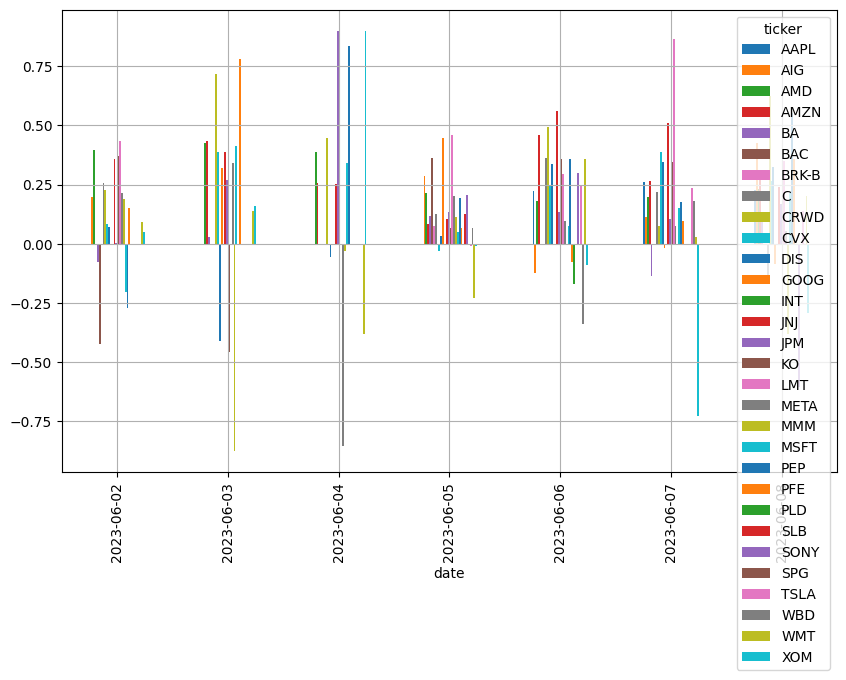

In [ ]:
import datetime

plt.rcParams['figure.figsize'] = [10, 6]
# Group by date and ticker columns from scored_news and calculate the mean
mean_scores = parsed_and_scored_news.groupby(['ticker','date']).mean()
# Unstack the column ticker
mean_scores = mean_scores.unstack()
# Get the cross-section of compound in the 'columns' axis
mean_scores = mean_scores.xs('compound', axis="columns").transpose()
# Filter the mean_scores dataframe to keep only the last seven days
last_seven_days = mean_scores.loc[datetime.datetime.now().date() - datetime.timedelta(days=6):]
# Plot a bar chart with pandas
last_seven_days.plot(kind='bar')

plt.grid()

In [ ]:
import plotly
import plotly.express as px

number_of_shares = tickers_dict.values()

# Group by each ticker and get the mean of all sentiment scores
mean_scores = parsed_and_scored_news.groupby(['ticker']).mean()
mean_scores

,neg,neu,pos,compound
ticker,,,,
AAPL,0.045631,0.770117,0.184243,0.233021
AIG,0.074233,0.755913,0.169835,0.135039
AMD,0.027243,0.768524,0.204223,0.291135
AMZN,0.045951,0.717534,0.236534,0.280560
BA,0.075243,0.839068,0.085709,0.008583
BAC,0.089417,0.783087,0.127515,0.057037
BRK-B,0.061427,0.826107,0.112466,0.075811
C,0.068835,0.844942,0.086214,0.028092
CRWD,0.046233,0.730767,0.222990,0.296943


In [ ]:
tickerdata = yf.Ticker('AAPL')
tickerdata.info

{'address1': 'One Apple Park Way',
 'city': 'Cupertino',
 'state': 'CA',
 'zip': '95014',
 'country': 'United States',
 'phone': '408 996 1010',
 'website': 'https://www.apple.com',
 'industry': 'Consumer Electronics',
 'industryDisp': 'Consumer Electronics',
 'sector': 'Technology',
 'longBusinessSummary': 'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. The company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, and HomePod. It also provides AppleCare support and cloud services; and operates various platforms, including the App Store that allow customers to discover and download applications and digital content, such as books, music, video, games, and podcasts. In addition, the company offers various services, such as Apple Arcade, a game subscriptio

In [ ]:
sectors = []
industries = []
prices = []
for ticker in tickers:
    print(ticker)
    tickerdata = yf.Ticker(ticker)
    prices.append(tickerdata.info['regularMarketOpen'])
    sectors.append(tickerdata.info['sector'])
    industries.append(tickerdata.info['industry'])

# dictionary {'column name': list of values for column} to be converted to dataframe
d = {'Sector': sectors, 'Industry': industries, 'Price': prices, 'No. of Shares': number_of_shares}
# create dataframe from 
df_info = pd.DataFrame(data=d, index = tickers)
df_info

AMZN
TSLA
GOOG
META
KO
PEP
BA
XOM
CVX
JNJ
JPM
INT
BAC
C
SPG
AAPL
MSFT
WMT
LMT
PFE
MMM
CRWD
WBD
DIS
AIG
BRK-B
SLB
SONY
PLD
AMD


,Sector,Industry,Price,No. of Shares
AMZN,Consumer Cyclical,Internet Retail,123.010,5
TSLA,Consumer Cyclical,Auto Manufacturers,224.220,1
GOOG,Communication Services,Internet Content & Information,122.585,9
META,Communication Services,Internet Content & Information,260.620,3
KO,Consumer Defensive,Beverages—Non-Alcoholic,60.130,10
PEP,Consumer Defensive,Beverages—Non-Alcoholic,179.700,5
BA,Industrials,Aerospace & Defense,212.340,5
XOM,Energy,Oil & Gas Integrated,108.770,5
CVX,Energy,Oil & Gas Integrated,160.160,4
JNJ,Healthcare,Drug Manufacturers—General,158.500,3


In [ ]:
df_info['Total Stock Value in Portfolio'] = df_info['Price']*df_info['No. of Shares']
df_info

,Sector,Industry,Price,No. of Shares,Total Stock Value in Portfolio
AMZN,Consumer Cyclical,Internet Retail,123.010,5,615.050
TSLA,Consumer Cyclical,Auto Manufacturers,224.220,1,224.220
GOOG,Communication Services,Internet Content & Information,122.585,9,1103.265
META,Communication Services,Internet Content & Information,260.620,3,781.860
KO,Consumer Defensive,Beverages—Non-Alcoholic,60.130,10,601.300
PEP,Consumer Defensive,Beverages—Non-Alcoholic,179.700,5,898.500
BA,Industrials,Aerospace & Defense,212.340,5,1061.700
XOM,Energy,Oil & Gas Integrated,108.770,5,543.850
CVX,Energy,Oil & Gas Integrated,160.160,4,640.640
JNJ,Healthcare,Drug Manufacturers—General,158.500,3,475.500


In [ ]:
df = mean_scores.join(df_info)
df = df.rename(columns={"compound": "Sentiment Score", "neg": "Negative", "neu": "Neutral", "pos": "Positive"})
df = df.reset_index()
df

,ticker,Negative,Neutral,Positive,Sentiment Score,Sector,Industry,Price,No. of Shares,Total Stock Value in Portfolio
0,AAPL,0.045631,0.770117,0.184243,0.233021,Technology,Consumer Electronics,177.895,16,2846.320
1,AIG,0.074233,0.755913,0.169835,0.135039,Financial Services,Insurance—Diversified,56.560,8,452.480
2,AMD,0.027243,0.768524,0.204223,0.291135,Technology,Semiconductors,118.295,5,591.475
3,AMZN,0.045951,0.717534,0.236534,0.280560,Consumer Cyclical,Internet Retail,123.010,5,615.050
4,BA,0.075243,0.839068,0.085709,0.008583,Industrials,Aerospace & Defense,212.340,5,1061.700
5,BAC,0.089417,0.783087,0.127515,0.057037,Financial Services,Banks—Diversified,29.280,5,146.400
6,BRK-B,0.061427,0.826107,0.112466,0.075811,Financial Services,Insurance—Diversified,335.490,14,4696.860
7,C,0.068835,0.844942,0.086214,0.028092,Financial Services,Banks—Diversified,47.730,5,238.650
8,CRWD,0.046233,0.730767,0.222990,0.296943,Technology,Software—Infrastructure,149.120,3,447.360
9,CVX,0.052330,0.802117,0.145544,0.137934,Energy,Oil & Gas Integrated,160.160,4,640.640


In [ ]:
fig = px.treemap(df, path=[px.Constant("Sectors"), 'Sector', 'Industry', 'ticker'], values='Total Stock Value in Portfolio',
                  color='Sentiment Score', hover_data=['Price', 'Negative', 'Neutral', 'Positive', 'Sentiment Score'],
                  color_continuous_scale=['#FF0000', "#000000", '#00FF00'],
                  color_continuous_midpoint=0)

In [ ]:
fig.data[0].customdata = df[['Price', 'Negative', 'Neutral', 'Positive', 'Sentiment Score']].round(3) # round to 3 decimal places
fig.data[0].texttemplate = "%{label}<br>%{customdata[4]}"

In [ ]:
fig.update_traces(textposition="middle center")
fig.update_layout(margin = dict(t=30, l=10, r=10, b=10), font_size=20)

In [ ]:
plotly.offline.plot(fig, filename='stock_sentiment.html') # this writes the plot into a html file and opens it
fig.show()

# Construcción de nuestra base de datos principal

En lo que sigue, reunimos elementos cuantitativos puros y una medida también cuantitativa pero de un elemento cualitativo, a saber, el sentimiento predominante relativo a una cierta acción.

## Extracción de información en Twitter.

En primer lugar, leemos desde Drive el contenido de la base de datos señalada previamente. Esta base registra comentarios o tweets con menciones a una de las acciones de un conjunto de empresas preeminentemente tecnológicas. Si bien no incluye, por tanto, tweets que no hagan mención directa a la acción, aunque aquellos puedan afectar a estos, sí nos ofrece un enorme conjunto de observaciones durante un periodo de 5 años.

In [ ]:
# para importar la base de datos desde google drive ya que pesa mas de 300MB
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# import tweets
tweets = pd.read_csv('/content/drive/MyDrive/trabajo_ml/Tweet.csv',engine='python', encoding='utf-8', error_bad_lines=False)
company_tweet = pd.read_csv('/content/drive/MyDrive/trabajo_ml/Company_Tweet.csv')

tweets=tweets.merge(company_tweet,how='left',on='tweet_id')
# format dates
tweets['date'] = pd.to_datetime(tweets['post_date'], unit='s').dt.date
tweets.date=pd.to_datetime( tweets.date,errors='coerce')
tweets['time'] = pd.to_datetime(tweets['post_date'], unit='s').dt.time

In [ ]:
tweets

,tweet_id,writer,post_date,body,comment_num,retweet_num,like_num,ticker_symbol,date,time
0,550441509175443456,VisualStockRSRC,1420070457,"lx21 made $10,008 on $AAPL -Check it out! htt...",0,0,1,AAPL,2015-01-01,00:00:57
1,550441672312512512,KeralaGuy77,1420070496,Insanity of today weirdo massive selling. $aap...,0,0,0,AAPL,2015-01-01,00:01:36
2,550441732014223360,DozenStocks,1420070510,S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...,0,0,0,AMZN,2015-01-01,00:01:50
3,550442977802207232,ShowDreamCar,1420070807,$GM $TSLA: Volkswagen Pushes 2014 Record Recal...,0,0,1,TSLA,2015-01-01,00:06:47
4,550443807834402816,i_Know_First,1420071005,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1,AAPL,2015-01-01,00:10:05
...,...,...,...,...,...,...,...,...,...,...
4336440,1212159838882533376,ShortingIsFun,1577836401,In 2020 I may start Tweeting out positive news...,0,0,1,TSLA,2019-12-31,23:53:21
4336441,1212160015332728833,Commuternyc,1577836443,Patiently Waiting for the no twitter sitter tw...,0,0,5,TSLA,2019-12-31,23:54:03
4336442,1212160410692046849,MoriaCrypto,1577836537,I don't discriminate. I own both $aapl and $ms...,1,0,1,AAPL,2019-12-31,23:55:37
4336443,1212160410692046849,MoriaCrypto,1577836537,I don't discriminate. I own both $aapl and $ms...,1,0,1,MSFT,2019-12-31,23:55:37


Comprobamos algunos estadísticos interesantes, en especial en lo relativo a count y a los parámetros de los tweets.

In [ ]:
tweets.describe()

,tweet_id,post_date,comment_num,retweet_num,like_num
count,4.336445e+06,4.336445e+06,4.336445e+06,4.336445e+06,4.336445e+06
mean,8.834282e+17,1.499461e+09,2.923863e-01,6.347647e-01,2.103625e+00
std,1.927735e+17,4.596080e+07,1.885788e+00,6.986371e+00,1.371744e+01
min,5.504415e+17,1.420070e+09,0.000000e+00,0.000000e+00,0.000000e+00
25%,7.185450e+17,1.460149e+09,0.000000e+00,0.000000e+00,0.000000e+00
50%,8.825934e+17,1.499262e+09,0.000000e+00,0.000000e+00,0.000000e+00
75%,1.054776e+18,1.540313e+09,0.000000e+00,0.000000e+00,1.000000e+00
max,1.212160e+18,1.577837e+09,6.310000e+02,9.990000e+02,9.990000e+02


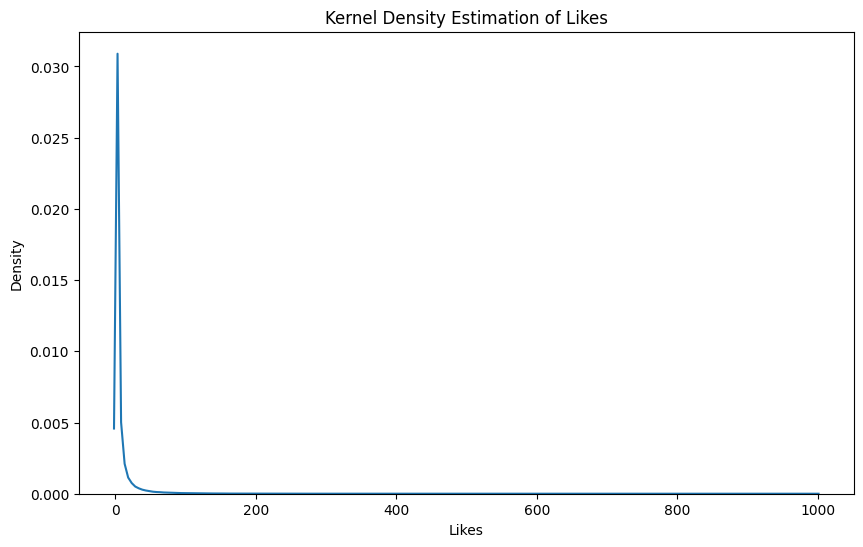

In [ ]:
sns.kdeplot(tweets.like_num)
plt.xlabel('Likes')
plt.ylabel('Density')
plt.title('Kernel Density Estimation of Likes')
plt.show()

In [ ]:
tweets.ticker_symbol.value_counts()

AAPL     1425013
TSLA     1096868
AMZN      718715
GOOG      392569
MSFT      375711
GOOGL     327569
Name: ticker_symbol, dtype: int64

## Analisis de Sentimientos: puntuaciones mediante Vader

Hacemos uso de la librería Vader para emplear su Sentiment Intensity Analizer, puesto que el desarrollo de funciones de esa categoría excede los objetivos y aprendizajes del curso.


In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
sia = SentimentIntensityAnalyzer()

# Veamos como funciona la función SIA para extraer la información y opinión del tweet
print(tweets.body[1676153])
sia.polarity_scores(tweets.body[1676153])

$TSLA + FANG stocks getting absolutely destroyed. Rough day for tech. :(


{'neg': 0.415, 'neu': 0.585, 'pos': 0.0, 'compound': -0.7501}

In [ ]:
print(tweets.body[573014])
sia.polarity_scores(tweets.body[573014])

Large Outflow of Money Witnessed in Google Inc. $GOOG http://bit.ly/1E6OJoC


{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [ ]:
def get_sentiment(tweets,ticker='TSLA',start='2017-01-01',end='2017-02-01'):
    #sbuset
    df=tweets.loc[((tweets.ticker_symbol==ticker)&(tweets.date>=start)&(tweets.date<=end))]
    # applt the SentimentIntensityAnalyzer
    df.loc[:,('score')]=df.loc[:,'body'].apply(lambda x: sia.polarity_scores(x)['compound'])
    # create label
    #bins= pd.interval_range(start=-1, freq=3, end=1)
    df.loc[:,('sentiment')]=pd.cut(np.array(df.loc[:,'score']),bins=[-1, -0.66, 0.32, 1],right=True ,labels=["bad", "neutral", "good"])
    df.loc[:, 'ticker'] = ticker

    df=df.loc[:,["date","score","sentiment","tweet_id","body",'ticker']]
    return df

In [ ]:
get_sentiment(tweets,ticker='TSLA',start='2017-01-01',end='2017-02-01')

,date,score,sentiment,tweet_id,body,ticker
1786176,2017-01-01,0.0000,neutral,815352552204238848,"$TSLA""I continue to believe that it’s the mark...",TSLA
1786180,2017-01-01,0.5984,good,815354565142937600,Baird analyst Ben Kallo is closing the year on...,TSLA
1786181,2017-01-01,0.0000,neutral,815355389877354497,$TSLAKallo rates Tesla’ stock an ‘Outperform’ ...,TSLA
1786187,2017-01-01,-0.5267,neutral,815364373438930945,"With #Tesla and #SolarCity combined, fossil fu...",TSLA
1786194,2017-01-01,0.0000,neutral,815369598358781952,"$IBM Financials Updated Saturday, December 31,...",TSLA
...,...,...,...,...,...,...
1863946,2017-02-01,0.1779,neutral,826936895829585922,These assets are seeing a jump in tweets $CMG ...,TSLA
1863955,2017-02-01,0.0000,neutral,826938171783053312,Here's a list of 14 stocks that are already up...,TSLA
1863965,2017-02-01,0.0000,neutral,826940688138919938,Here's a list of 14 stocks that are already up...,TSLA
1863968,2017-02-01,0.6597,good,826940848692621312,Commented on The Tesla Self-Driving Dreams Are...,TSLA


Estas funciones no solamente permiten realizar automáticamente una medida del sentimiento respecto de una cierta acción, sino que también permite customizar el algoritmo con términos custom. Para demostrar su utilidad, ampliamos el vocabulario con palabras relacionadas con sentimientos positivos o negativos en los mercados financieros.

In [ ]:
positive_words= 'buy bull long support undervalued underpriced cheap upward rising trend moon rocket hold breakout call beat support buying holding high profit win growth optimistic opportunity advantage success wealth bullish gains positive prosper rich advancement boom exciting promising increase improve appreciate lucrative potential strong best excellent outperform'
negative_words=  'sell bear bubble bearish short overvalued overbought overpriced expensive downward falling sold miss resistance squeeze cover seller loss decline negative crash risk downtrend slump volatility concern downgrade fear worry deteriorate dip decrease weak collapse uncertain problem bearish deficit struggle worst disaster underperform outflow'
dictOfpos = { i : 4 for i in positive_words.split(" ") }
dictOfneg = { i : -4 for i in negative_words.split(" ")  }
Financial_Lexicon = {**dictOfpos, **dictOfneg}

sia.lexicon.update(Financial_Lexicon)


In [ ]:
print(tweets.body[573014])
sia.polarity_scores(tweets.body[573014])

Large Outflow of Money Witnessed in Google Inc. $GOOG http://bit.ly/1E6OJoC


{'neg': 0.357, 'neu': 0.643, 'pos': 0.0, 'compound': -0.7184}

In [ ]:
# Para importar más de una compañía:
# tweets_df=[]
# for company in ['AAPL', 'TSLA']:
#   tweets_df.append(get_sentiment(tweets,ticker=company,start='2018-01-01',end='2019-12-31'))

# tweets_df

In [ ]:
tweets_aapl=get_sentiment(tweets,ticker='AAPL',start='2015-01-01',end='2019-12-31')
tweets_aapl

# La ejecución del código anterior tarda bastante porque hay muchos tweets para 
# APPLE y el algoritmo va palabra a palabra leyendo el sentimiento de cada tweet.

,date,score,sentiment,tweet_id,body,ticker
0,2015-01-01,0.0000,neutral,550441509175443456,"lx21 made $10,008 on $AAPL -Check it out! htt...",AAPL
1,2015-01-01,-0.8271,bad,550441672312512512,Insanity of today weirdo massive selling. $aap...,AAPL
4,2015-01-01,0.0000,neutral,550443807834402816,Swing Trading: Up To 8.91% Return In 14 Days h...,AAPL
6,2015-01-01,0.0000,neutral,550443808606126081,Swing Trading: Up To 8.91% Return In 14 Days h...,AAPL
8,2015-01-01,0.0000,neutral,550443809700851716,Swing Trading: Up To 8.91% Return In 14 Days h...,AAPL
...,...,...,...,...,...,...
4336437,2019-12-31,0.8481,good,1212159254884433921,Imagine calling your broker-dealer and wanting...,AAPL
4336438,2019-12-31,0.7574,good,1212159275637886976,"$AAPL yearly~ Heck of a year.. Jan. 2, 1999~ar...",AAPL
4336439,2019-12-31,-0.3382,neutral,1212159765914079234,That $SPY $SPX puuump in the last hour was the...,AAPL
4336442,2019-12-31,0.0000,neutral,1212160410692046849,I don't discriminate. I own both $aapl and $ms...,AAPL


In [ ]:
tweets_aapl_final = tweets_aapl.groupby(['ticker', 'date']).agg(tweet_volume=('score', 'count'), sentiment_score=('score', 'mean')).reset_index()
tweets_aapl_final

,ticker,date,tweet_volume,sentiment_score
0,AAPL,2015-01-01,299,0.149022
1,AAPL,2015-01-02,867,0.112948
2,AAPL,2015-01-03,346,0.297905
3,AAPL,2015-01-04,406,0.239043
4,AAPL,2015-01-05,1147,0.161437
...,...,...,...,...
1814,AAPL,2019-12-27,381,0.218814
1815,AAPL,2019-12-28,210,0.157038
1816,AAPL,2019-12-29,190,0.163587
1817,AAPL,2019-12-30,732,0.244986


## Datos financieros: Yahoo Finance

Usamos la librería yfinance para exportar datos de la API de Yahoo!Finance. Esta librería ofrece una vía rápida y fiable para obtener, como ya hemos visto, datos sofisticados, exhaustivos y fiables sobre múltiples activos a lo largo y ancho de una multitud de clases.

El caso de Google ofrece un cierto desafío; aunque una opción sería fusionar ambos tickers y sus tweets asociados, por sencillez optamos por escoger el ticker 'GOOG' como representante de ambos.

In [ ]:
from datetime import datetime
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# Tickers de las compañias
stock_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN', 'TSLA']

# importante coger más fechas en en los tweets para que los indicadores no aparezcan como nan
end = datetime(2019, 12, 31)
start = datetime(2014, 1, 1)

for stock in stock_list:
    globals()[stock] = yf.download(stock, start, end)
    

company_list = [AAPL, GOOG, MSFT, AMZN, TSLA]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON", "TESLA"]
ticker_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN', 'TSLA']

for company, com_name, ticker in zip(company_list, company_name, ticker_list):
    company["company_name"] = com_name
    company["ticker"] = ticker
    
stocks_df = pd.concat(company_list, axis=0)
stocks_df

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name,ticker
Date,,,,,,,,
2014-01-02,19.845715,19.893929,19.715000,19.754642,17.364958,234684800,APPLE,AAPL
2014-01-03,19.745001,19.775000,19.301071,19.320715,16.983524,392467600,APPLE,AAPL
2014-01-06,19.194643,19.528570,19.057142,19.426071,17.076143,412610800,APPLE,AAPL
2014-01-07,19.440001,19.498571,19.211430,19.287144,16.954014,317209200,APPLE,AAPL
2014-01-08,19.243214,19.484285,19.238930,19.409286,17.061380,258529600,APPLE,AAPL
...,...,...,...,...,...,...,...,...
2019-12-23,27.452000,28.134001,27.333332,27.948000,27.948000,199794000,TESLA,TSLA
2019-12-24,27.890667,28.364668,27.512667,28.350000,28.350000,120820500,TESLA,TSLA
2019-12-26,28.527332,28.898666,28.423332,28.729334,28.729334,159508500,TESLA,TSLA


In [ ]:
AAPL

,Open,High,Low,Close,Adj Close,Volume,company_name,ticker
Date,,,,,,,,
2014-01-02,19.845715,19.893929,19.715000,19.754642,17.364958,234684800,APPLE,AAPL
2014-01-03,19.745001,19.775000,19.301071,19.320715,16.983524,392467600,APPLE,AAPL
2014-01-06,19.194643,19.528570,19.057142,19.426071,17.076143,412610800,APPLE,AAPL
2014-01-07,19.440001,19.498571,19.211430,19.287144,16.954014,317209200,APPLE,AAPL
2014-01-08,19.243214,19.484285,19.238930,19.409286,17.061380,258529600,APPLE,AAPL
...,...,...,...,...,...,...,...,...
2019-12-23,70.132500,71.062500,70.092499,71.000000,69.355133,98572000,APPLE,AAPL
2019-12-24,71.172501,71.222504,70.730003,71.067497,69.421066,48478800,APPLE,AAPL
2019-12-26,71.205002,72.495003,71.175003,72.477501,70.798409,93121200,APPLE,AAPL


In [ ]:
# convertimos las fechas en una columna
stocks_df.reset_index(inplace=True)
stocks_df.rename(columns={'index': 'Date'}, inplace=True)
stocks_df

,Date,Open,High,Low,Close,Adj Close,Volume,company_name,ticker
0,2014-01-02,19.845715,19.893929,19.715000,19.754642,17.364958,234684800,APPLE,AAPL
1,2014-01-03,19.745001,19.775000,19.301071,19.320715,16.983524,392467600,APPLE,AAPL
2,2014-01-06,19.194643,19.528570,19.057142,19.426071,17.076143,412610800,APPLE,AAPL
3,2014-01-07,19.440001,19.498571,19.211430,19.287144,16.954014,317209200,APPLE,AAPL
4,2014-01-08,19.243214,19.484285,19.238930,19.409286,17.061380,258529600,APPLE,AAPL
...,...,...,...,...,...,...,...,...,...
7540,2019-12-23,27.452000,28.134001,27.333332,27.948000,27.948000,199794000,TESLA,TSLA
7541,2019-12-24,27.890667,28.364668,27.512667,28.350000,28.350000,120820500,TESLA,TSLA
7542,2019-12-26,28.527332,28.898666,28.423332,28.729334,28.729334,159508500,TESLA,TSLA
7543,2019-12-27,29.000000,29.020666,28.407333,28.691999,28.691999,149185500,TESLA,TSLA


## Extracción de características financieras

Para mejorar el rendimiento predictivo de nuestros modelos, vamos a facilitar a estos el trabajo de optimización computando algunas de las métricas clave de índole financiera, empleadas a la hora de realizar análisis fundamental.

In [ ]:
# Calcular indicadores: MA, MACD, RSI, EWMA
prices=stocks_df.copy()
# format date
prices['Date'] = pd.to_datetime(prices['Date'], format="%Y-%m-%d").dt.date.astype('datetime64[ns]')
prices=prices.sort_values(by=['Date']).reset_index()
# rename date column for consistency
prices=prices.rename(columns={"Date": "date"})

def create_indicators(data):
    
    prices = data.sort_values(by=['date']).reset_index()

    # create simple moving average
    n=[5,10,200,300]
    for i in n:
        prices.loc[:,(str("MA"+str(i)))]=prices['Close'].rolling(i).mean()    

    # Calculamos amplitud del movimiento diario entre max y min, corregido al cierre

    

    # Calculate MACD  
    day26=prices['Close'].ewm(span=26, adjust=False).mean()
    day12=prices['Close'].ewm(span=12, adjust=False).mean()
    prices.loc[:,('macd')]=day12-day26 
    prices.loc[:,('signal')]=prices['macd'].ewm(span=9, adjust=False).mean()

    # Calculate RSI 
    up = np.log(prices.Close).diff(1)
    down = np.log(prices.Close).diff(1)

    up[up<0]=0
    down[down>0]=0

    # Calculate the EWMA
    roll_up = up.ewm(span=14).mean()
    roll_down = down.abs().ewm(span=14).mean()

    # Calculate the RSI based on EWMA
    RS1 = roll_up / roll_down
    RSI1 = 100.0 - (100.0 / (1.0 + RS1))
    prices.loc[:,('rsi')]=RSI1

    return prices

# create dict, by ticker
d = dict(tuple(prices.groupby('ticker')))
d = {k:create_indicators(v) for k, v in d.items()}

def subset_prices(d,ticker,start,end):
    x=d[ticker]
    x=x[((x.date>=start)&(x.date<=end))]
    return x

In [ ]:
final_stocks_df=create_indicators(prices)
final_stocks_df

,level_0,index,date,Open,High,Low,Close,Adj Close,Volume,company_name,ticker,MA5,MA10,MA200,MA300,macd,signal,rsi
0,0,0,2014-01-02,19.845715,19.893929,19.715000,19.754642,17.364958,234684800,APPLE,AAPL,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN
1,1,1509,2014-01-02,27.782366,27.839401,27.603037,27.724083,27.724083,73129082,GOOGLE,GOOG,NaN,NaN,NaN,NaN,0.635739,0.127148,100.000000
2,2,3018,2014-01-02,37.349998,37.400002,37.099998,37.160000,31.420706,30632200,MICROSOFT,MSFT,NaN,NaN,NaN,NaN,1.879303,0.477579,100.000000
3,3,4527,2014-01-02,19.940001,19.968000,19.701000,19.898500,19.898500,42756000,AMAZON,AMZN,NaN,NaN,NaN,NaN,1.455203,0.673104,44.874188
4,4,6036,2014-01-02,9.986667,10.165333,9.770000,10.006667,10.006667,92826000,TESLA,TSLA,22.908779,NaN,NaN,NaN,0.317255,0.601934,26.396185
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7540,7542,1508,2019-12-30,72.364998,73.172501,71.305000,72.879997,71.191589,144114400,APPLE,AAPL,67.021298,75.673183,79.294991,77.243741,-1.397698,-0.405108,50.153073
7541,7543,6035,2019-12-30,93.699997,94.199997,92.030998,92.344498,92.344498,73494000,AMAZON,AMZN,79.751797,78.105633,79.441686,77.367540,-0.322121,-0.388510,52.817487
7542,7540,4526,2019-12-30,158.990005,159.020004,156.729996,157.589996,152.490112,16348400,MICROSOFT,MSFT,97.750897,86.616882,79.785471,77.841055,5.729007,0.834993,58.584813
7543,7541,3017,2019-12-30,67.500000,67.650002,66.700996,66.806999,66.806999,21018000,GOOGLE,GOOG,96.622298,90.424649,80.014533,77.609478,3.162683,1.300531,47.767225


## Análisis gráfico

A continuación desarrollamos un análisis preliminar de los datos financieros descargados.

In [ ]:
!pip install mplfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.1/73.1 kB 3.9 MB/s eta 0:00:00


In [ ]:
from matplotlib.dates import date2num, DateFormatter, WeekdayLocator,\
    DayLocator, MONDAY
import seaborn as sns

import mplfinance as mpf
from mplfinance.original_flavor import candlestick_ohlc

from scipy import stats
from scipy.stats import zscore
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import coint

import datetime
from datetime import date, timedelta

In [ ]:
stock_analisis=stocks_df.copy()

In [ ]:
tickers = ['AMZN', 'AAPL', 'TSLA', 'MSFT', 'GOOG']
adj_close = pd.DataFrame()

for ticker in tickers:
    ticker_data = stock_analisis[stock_analisis['ticker'] == ticker][['Date', 'Adj Close']]
    ticker_data.set_index('Date', inplace=True)
    adj_close[ticker] = ticker_data['Adj Close']

adj_close.columns = tickers
adj_close

,AMZN,AAPL,TSLA,MSFT,GOOG
Date,,,,,
2014-01-02,19.898500,17.364958,10.006667,31.420706,27.724083
2014-01-03,19.822001,16.983524,9.970667,31.209322,27.521841
2014-01-06,19.681499,17.076143,9.800000,30.549793,27.828691
2014-01-07,19.901501,16.954014,9.957333,30.786562,28.365179
2014-01-08,20.096001,17.061380,10.085333,30.236935,28.424210
...,...,...,...,...,...
2019-12-23,89.650002,69.355133,27.948000,152.315918,67.442001
2019-12-24,89.460503,69.421066,28.350000,152.286926,67.178001
2019-12-26,93.438499,70.798409,28.729334,153.535141,68.019997


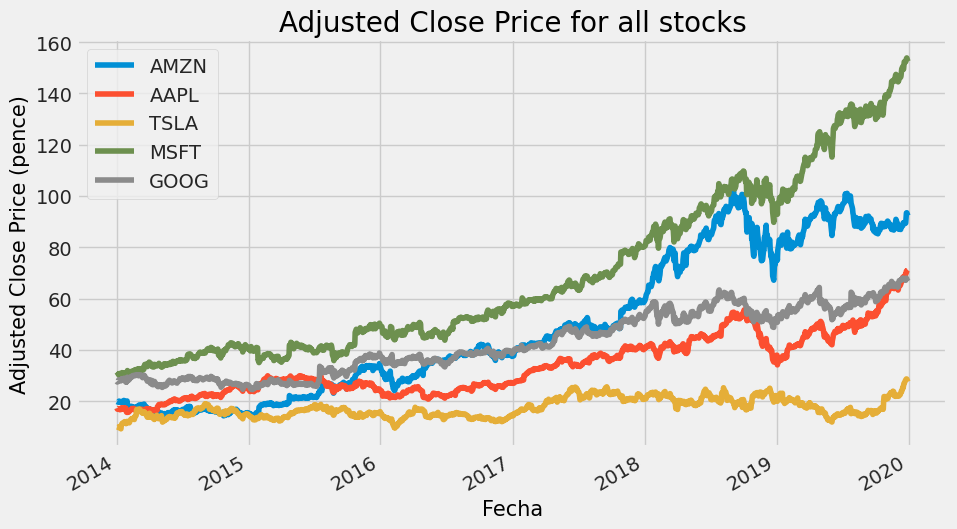

In [ ]:
adj_close.plot(grid = True)
sns.set(rc={'figure.figsize':(30, 20)})
plt.title('Adjusted Close Price for all stocks', color = 'black', fontsize = 20)
plt.xlabel('Fecha', color = 'black', fontsize = 15)
plt.ylabel('Adjusted Close Price (pence)', color = 'black', fontsize = 15);

In [ ]:
# Empleamos la función lambda para calcular min y max de Adjusted Close Price 
adj_close_min_max = adj_close.apply(lambda x: pd.Series([x.min(), x.max()], 
                              index=['min', 'max']))

adj_close_min_max

,AMZN,AAPL,TSLA,MSFT,GOOG
min,14.347500,15.690104,9.289333,29.577406,24.560070
max,101.975502,71.191589,28.729334,153.815765,68.058502


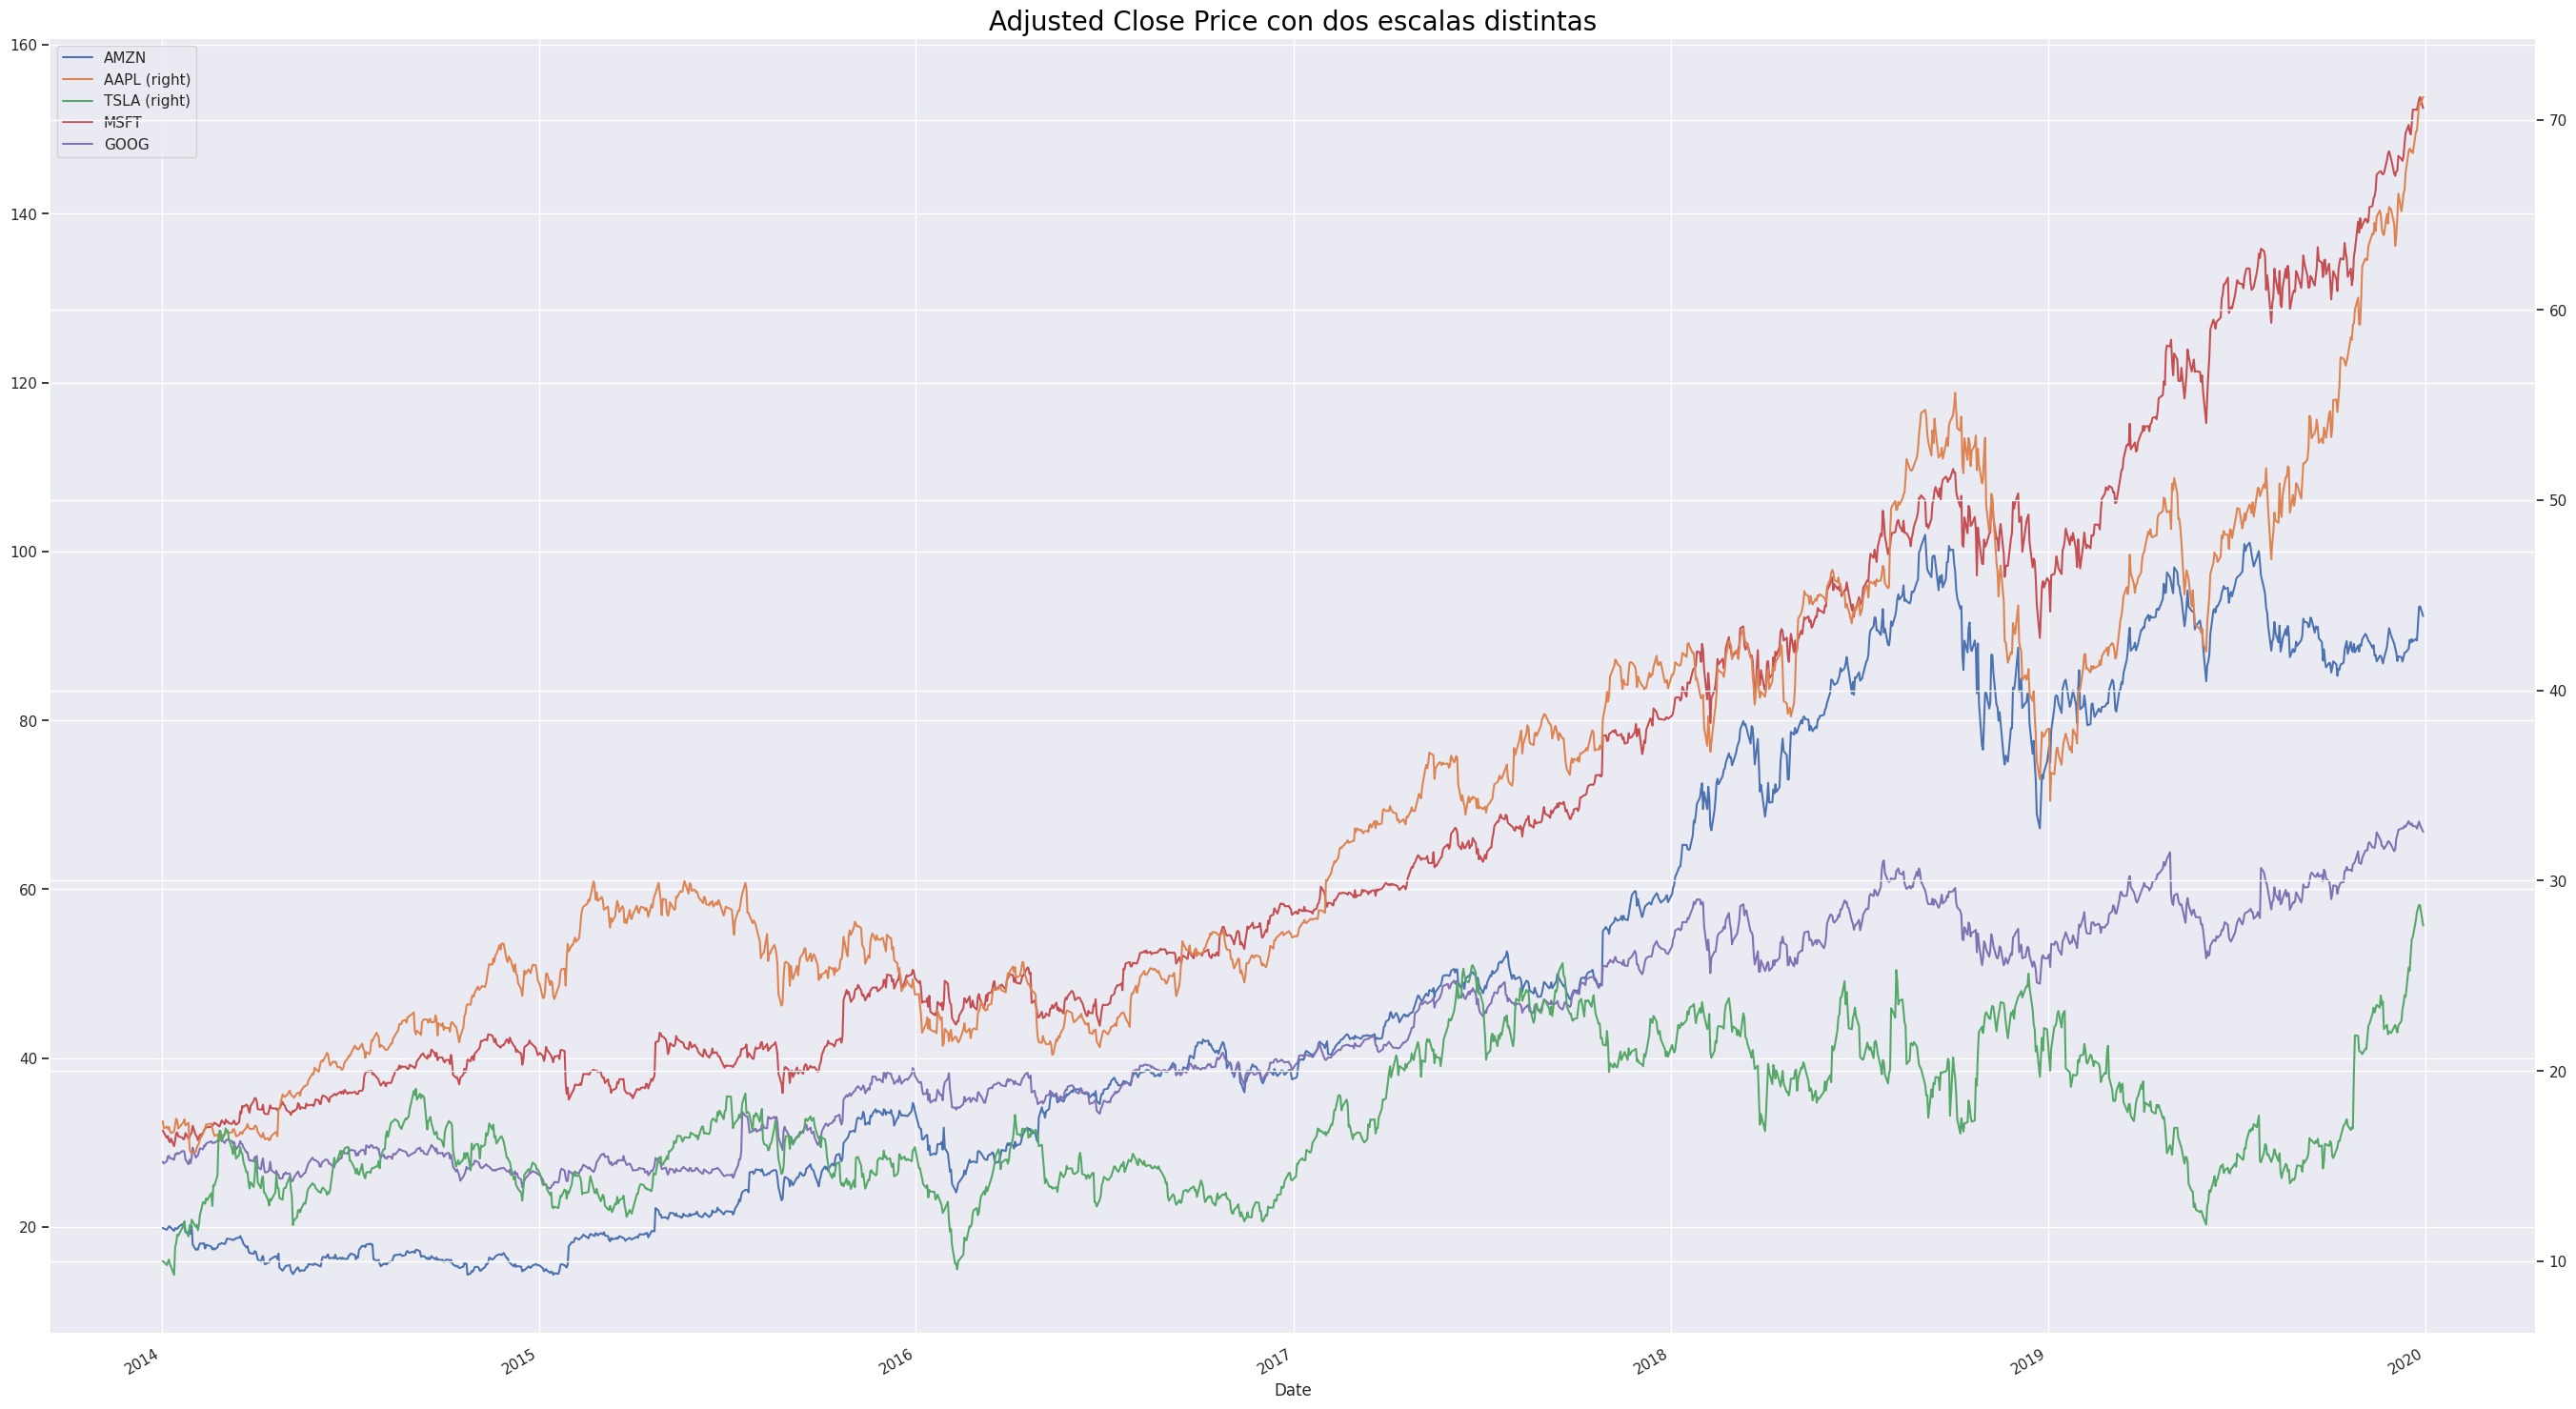

In [ ]:
# Ploteamos con dos ejes distintos para vsualizar mejor la volatilidad

adj_close.plot(secondary_y = ["AAPL", "TSLA"], grid = True)
sns.set(rc={'figure.figsize':(15, 9)})
plt.title('Adjusted Close Price con dos escalas distintas', color = 'black', fontsize = 20);

In [ ]:
# Transformo mediante labda para obtener retorno

returns_lambda = adj_close.apply(lambda x: x / x[0])
returns_lambda.head()

,AMZN,AAPL,TSLA,MSFT,GOOG
Date,,,,,
2014-01-02,1.000000,1.000000,1.000000,1.000000,1.000000
2014-01-03,0.996155,0.978034,0.996402,0.993272,0.992705
2014-01-06,0.989095,0.983368,0.979347,0.972282,1.003773
2014-01-07,1.000151,0.976335,0.995070,0.979818,1.023124
2014-01-08,1.009925,0.982518,1.007861,0.962325,1.025253


Text(0, 0.5, 'Returns (%)')

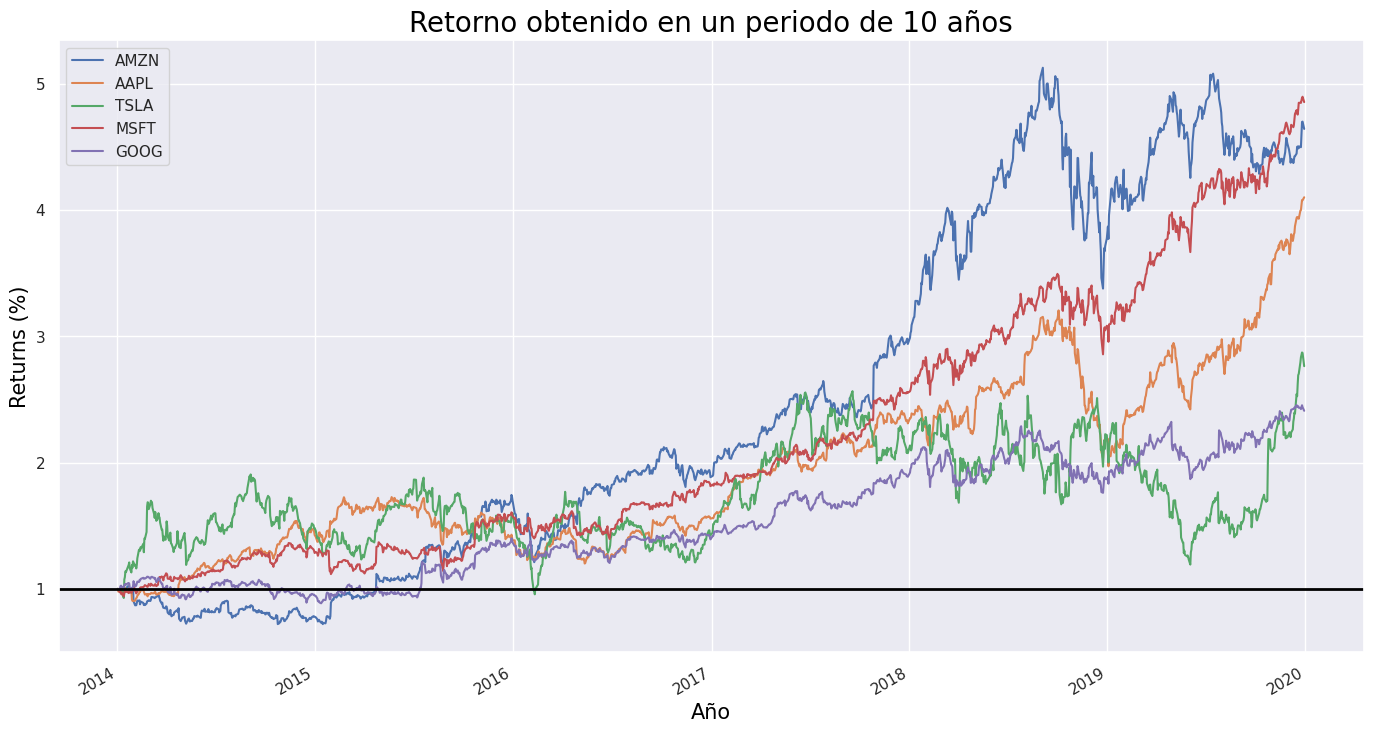

In [ ]:
# Beneficio obtenido de cada acción 

returns_lambda.plot(grid = True).axhline(y = 1, color = "black", lw = 2)
sns.set(rc={'figure.figsize':(15, 9)})
plt.title('Retorno obtenido en un periodo de 10 años', color = 'black', fontsize = 20)
plt.xlabel('Año', color = 'black', fontsize = 15)
plt.ylabel('Returns (%)', color = 'black', fontsize = 15)

In [ ]:
returns = pd.DataFrame()

tickers = ['AMZN', 'AAPL', 'TSLA', 'MSFT', 'GOOG']
for ticker in tickers:
    ticker_data = stocks_df[stocks_df['ticker'] == ticker]['Adj Close'].pct_change() * 100
    returns[ticker] = ticker_data.reset_index(drop=True)

returns.columns = tickers
returns

,AMZN,AAPL,TSLA,MSFT,GOOG
0,NaN,NaN,NaN,NaN,NaN
1,-0.384451,-2.196570,-0.359763,-0.672753,-0.729481
2,-0.708814,0.545346,-1.711688,-2.113243,1.114934
3,1.117807,-0.715205,1.605433,0.775026,1.927822
4,0.977313,0.633281,1.285487,-1.785283,0.208109
...,...,...,...,...,...
1504,0.363845,1.631819,3.360536,0.000000,-0.055570
1505,-0.211376,0.095066,1.438387,-0.019034,-0.391447
1506,4.446652,1.984041,1.338037,0.819647,1.253379
1507,0.055115,-0.037965,-0.129952,0.182775,-0.625550


In [ ]:
# Clean up the data by dropping the first value which becomes a 'NaN' as there is no price change from the day before.

returns.dropna(inplace=True)
returns.head()

,AMZN,AAPL,TSLA,MSFT,GOOG
1,-0.384451,-2.196570,-0.359763,-0.672753,-0.729481
2,-0.708814,0.545346,-1.711688,-2.113243,1.114934
3,1.117807,-0.715205,1.605433,0.775026,1.927822
4,0.977313,0.633281,1.285487,-1.785283,0.208109
5,-0.226412,-1.276982,-2.478847,-0.643177,-0.963001


In [ ]:
# Use numpy's log function to obtain and plot the log differences of the adjusted price data

stock_change = adj_close.apply(lambda x: np.log(x) - np.log(x.shift(1))) # shift moves dates back by 1.

stock_change.head()

,AMZN,AAPL,TSLA,MSFT,GOOG
Date,,,,,
2014-01-02,NaN,NaN,NaN,NaN,NaN
2014-01-03,-0.003852,-0.022211,-0.003604,-0.006750,-0.007322
2014-01-06,-0.007113,0.005439,-0.017265,-0.021359,0.011088
2014-01-07,0.011116,-0.007178,0.015927,0.007720,0.019095
2014-01-08,0.009726,0.006313,0.012773,-0.018014,0.002079


In [ ]:
# Nos cargamos los NaNs

stock_change.dropna(inplace=True)
stock_change.head()

,AMZN,AAPL,TSLA,MSFT,GOOG
Date,,,,,
2014-01-03,-0.003852,-0.022211,-0.003604,-0.006750,-0.007322
2014-01-06,-0.007113,0.005439,-0.017265,-0.021359,0.011088
2014-01-07,0.011116,-0.007178,0.015927,0.007720,0.019095
2014-01-08,0.009726,0.006313,0.012773,-0.018014,0.002079
2014-01-09,-0.002267,-0.012852,-0.025101,-0.006453,-0.009677


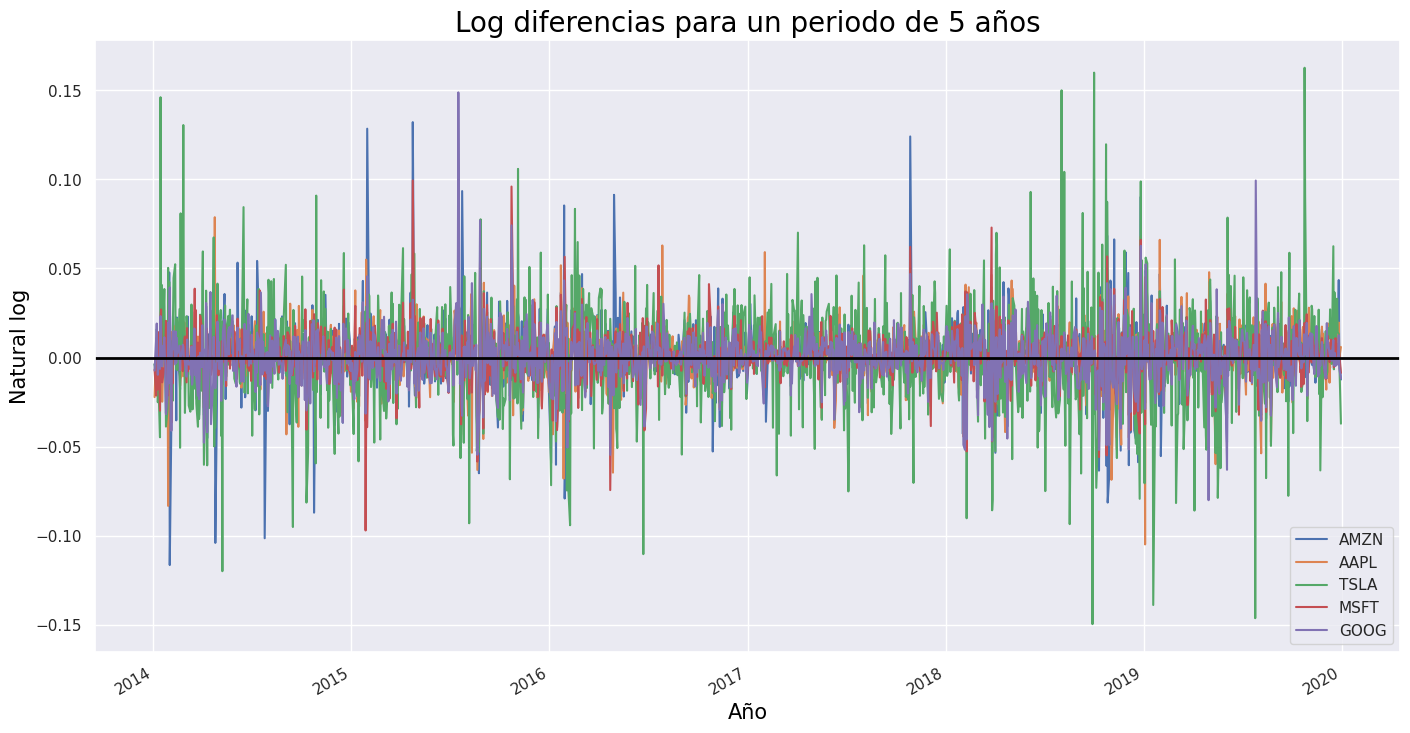

In [ ]:
# Ploteamos log diferencias para un periodo de 5 años

stock_change.plot(grid = True).axhline(y = 0, color = "black", lw = 2)
sns.set(rc={'figure.figsize':(15, 9)})
plt.title('Log diferencias para un periodo de 5 años', color = 'black', fontsize = 20)
plt.xlabel('Año', color = 'black', fontsize = 15)
plt.ylabel('Natural log', color = 'black', fontsize = 15);

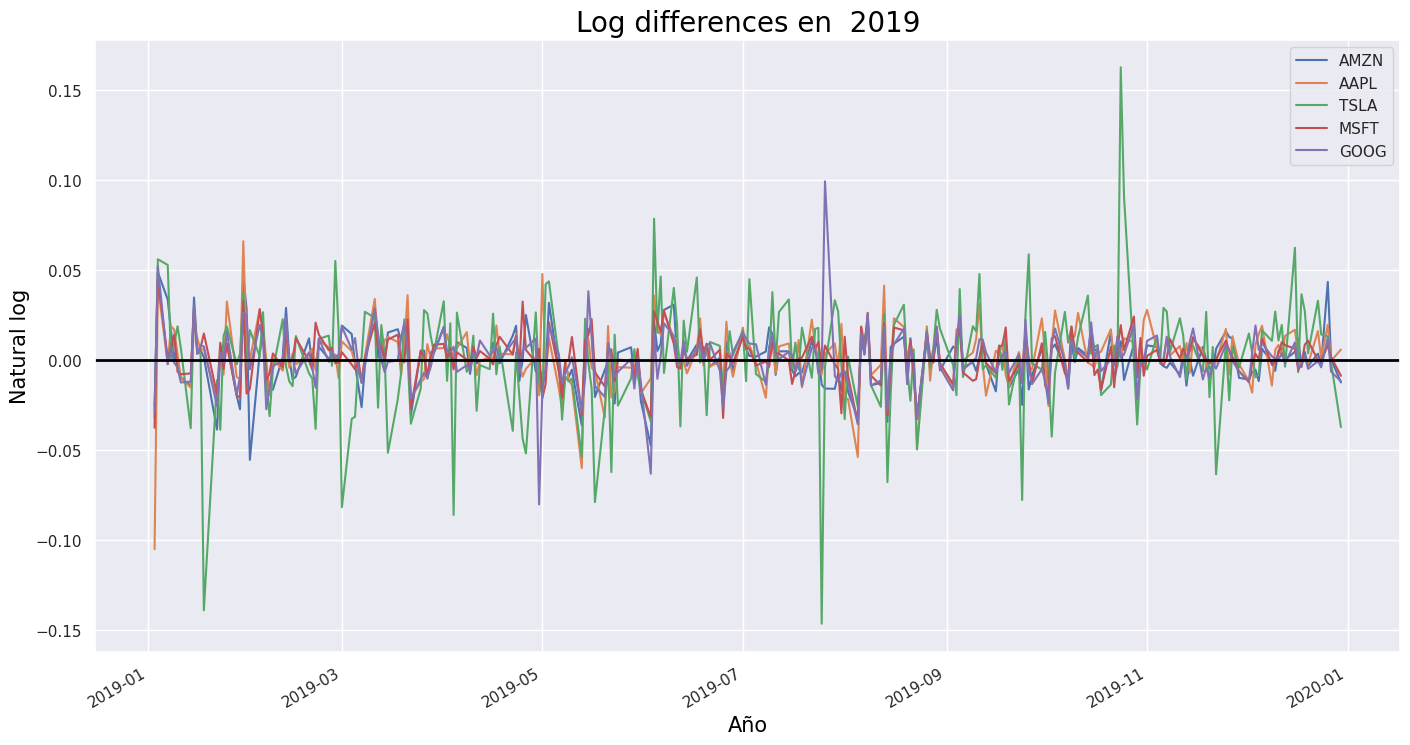

In [ ]:
# Log differences en  2019

stock_change.loc['2019-01-01':'2019-12-31'][1:].plot(grid = True).axhline(y = 0, color = "black", lw = 2)
sns.set(rc={'figure.figsize':(15, 9)})
plt.title('Log differences en  2019', color = 'black', fontsize = 20)
plt.xlabel('Año', color = 'black', fontsize = 15)
plt.ylabel('Natural log', color = 'black', fontsize = 15);

In [ ]:
# Anualizo retornos

stock_change_apr = stock_change * 252 * 100    #252 trading days por año; 
stock_change_apr

,AMZN,AAPL,TSLA,MSFT,GOOG
Date,,,,,
2014-01-03,-97.068305,-559.705607,-90.823663,-170.106662,-184.502972
2014-01-06,-179.257063,137.053780,-435.079658,-538.244625,279.408699
2014-01-07,280.124691,-180.879277,401.355876,194.553505,481.187633
2014-01-08,245.087203,159.083639,321.878384,-453.955718,52.389011
2014-01-09,-57.120568,-323.871719,-632.542191,-162.604143,-243.852374
...,...,...,...,...,...
2019-12-23,91.522553,407.899331,832.936674,0.000000,-14.007576
2019-12-24,-53.323217,23.945280,359.891395,-4.797006,-98.838313
2019-12-26,1096.357338,495.083019,334.949416,205.709064,313.888588


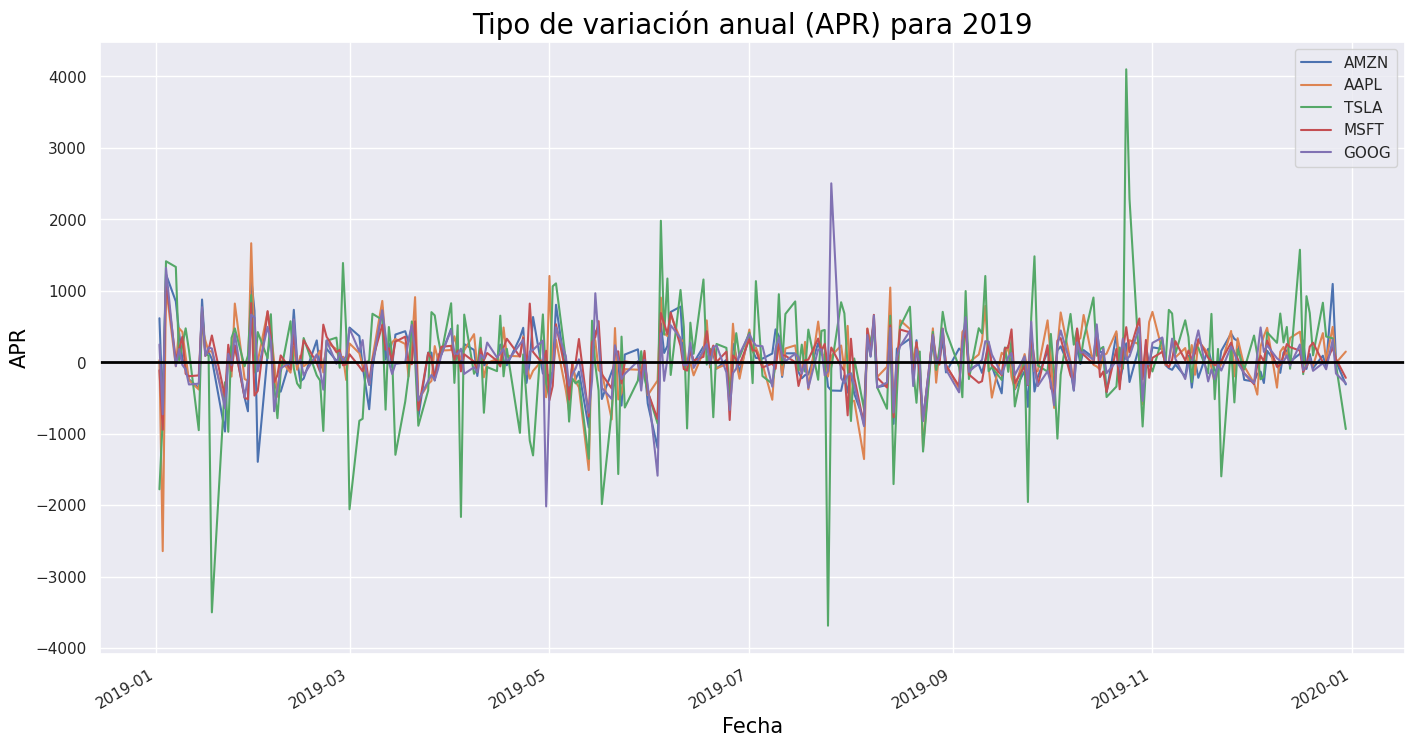

In [ ]:
# 

stock_change_apr['2019-01-01':'2019-12-31'].plot(grid = True).axhline(y = 0, color = "black", lw = 2)
sns.set(rc={'figure.figsize':(15, 9)})
plt.title('Tipo de variación anual (APR) para 2019', color = 'black', fontsize = 20)
plt.xlabel('Fecha', color = 'black', fontsize = 15)
plt.ylabel('APR', color = 'black', fontsize = 15);

In [ ]:
# Observación con peor resultado serie

returns.idxmin()

AMZN      20
AAPL    1259
TSLA    1194
MSFT     268
GOOG    1339
dtype: int64

In [ ]:
# Observación con mejor resultado serie

returns.idxmax()

AMZN     329
AAPL      77
TSLA    1463
MSFT     329
GOOG     387
dtype: int64

In [ ]:
# Media retornos

returns.mean()

AMZN    0.119355
AAPL    0.105371
TSLA    0.108293
MSFT    0.114952
GOOG    0.069267
dtype: float64

In [ ]:
# Varianza de los retornos
returns.var()

AMZN    3.523955
AAPL    2.349554
TSLA    8.226384
MSFT    2.036359
GOOG    2.204311
dtype: float64

In [ ]:
# De modo similar calculamos la desviación estándar 
returns.std()

AMZN    1.877220
AAPL    1.532825
TSLA    2.868167
MSFT    1.427010
GOOG    1.484692
dtype: float64

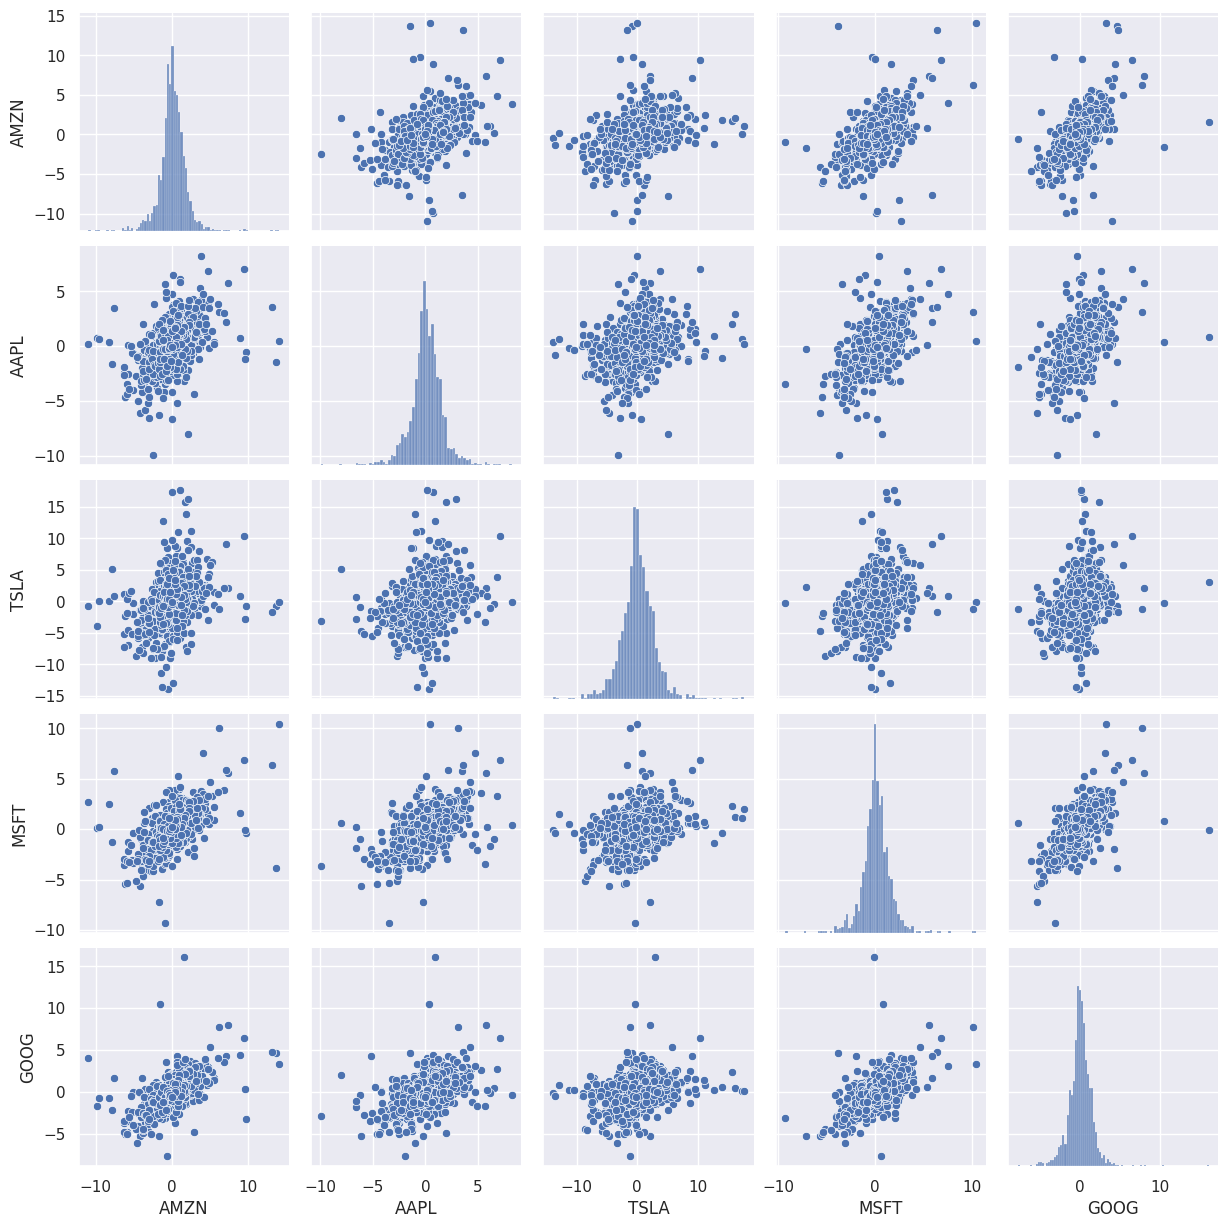

In [ ]:
# Realizamos un scatterplot de los retornos de las distintas acciónes para intentar descubrir relaciones entre ellas

sns.pairplot(returns);

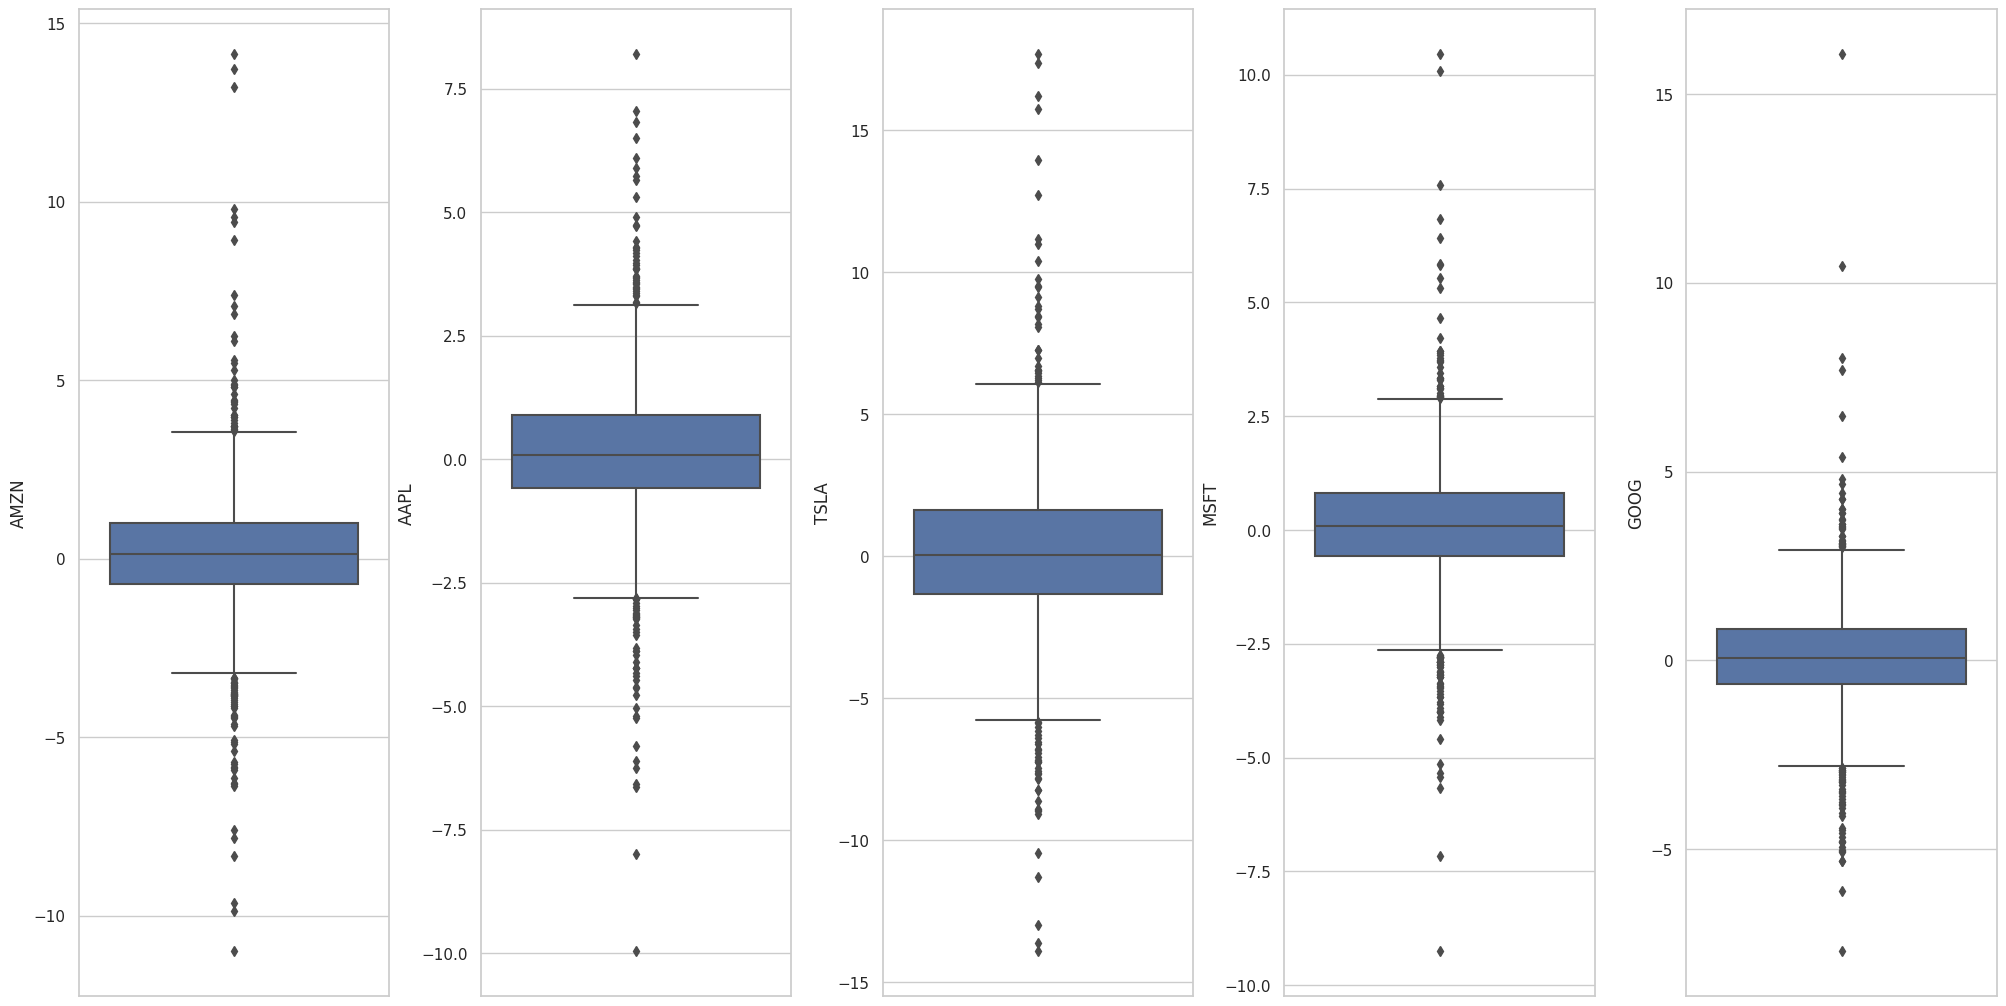

In [ ]:
# Boxplots mostrando la distribución de retornos y outliers

sns.set_style("whitegrid")
fig, axs = plt.subplots(ncols=5, nrows=1, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in returns.items():
    sns.boxplot(y=k, data=returns, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

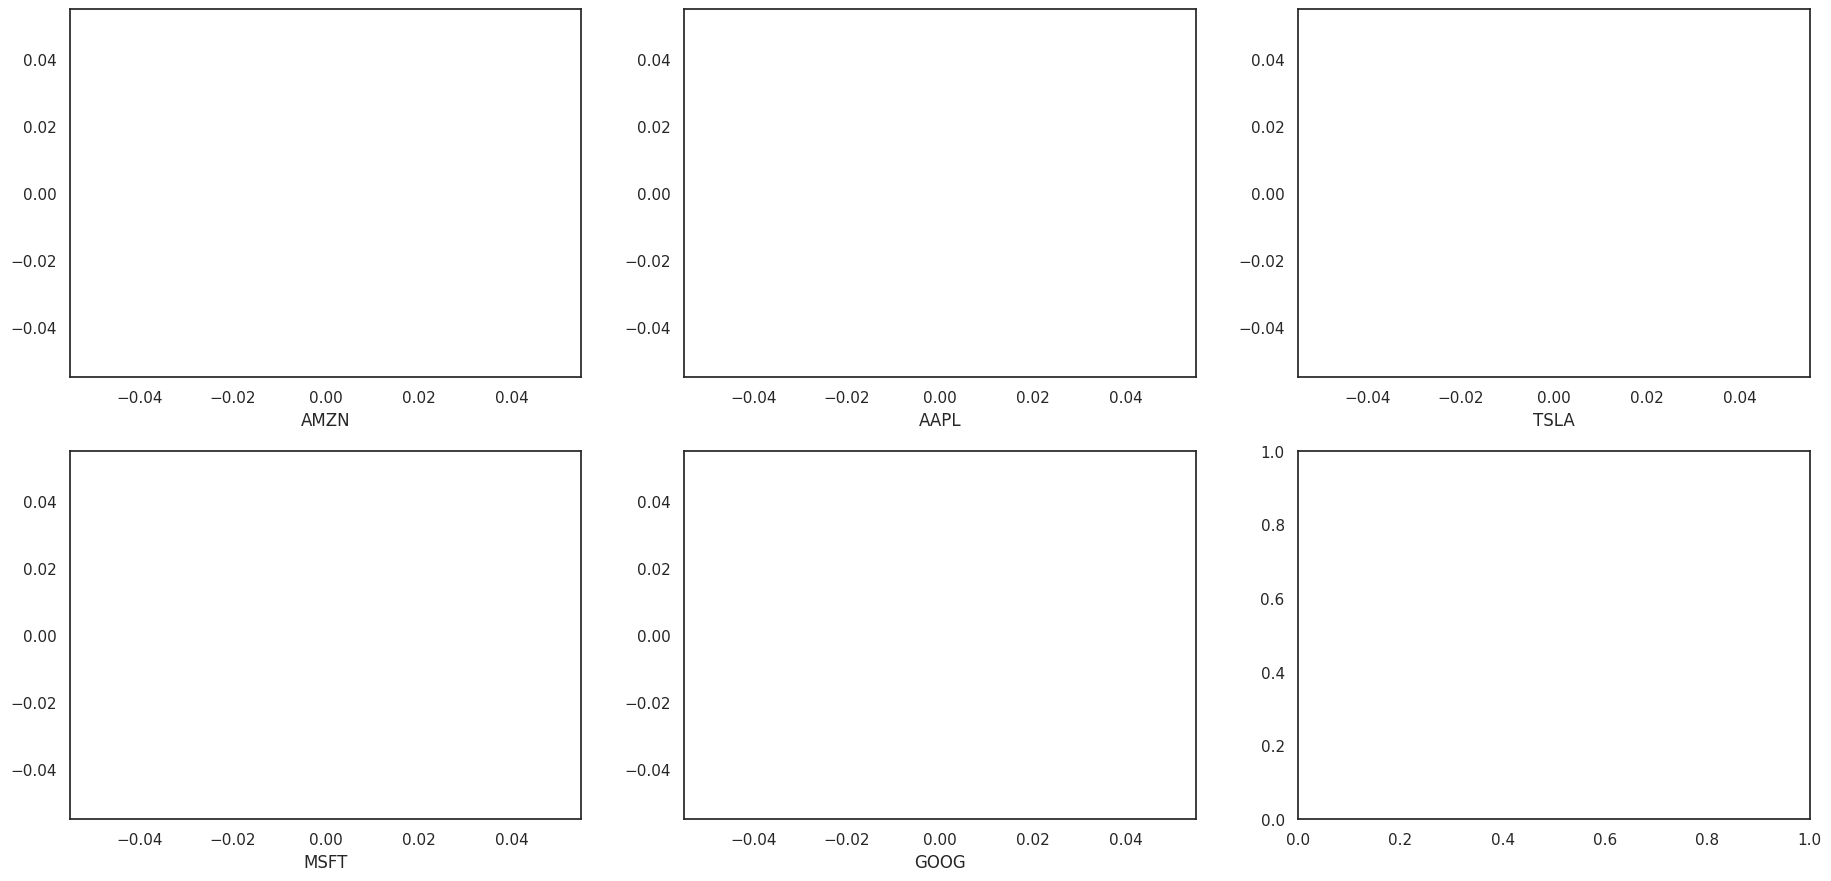

In [ ]:
# Distribution plots showing the data for returns for 2019 

sns.set_style("white")

fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()

for ticker in tickers:
    sns.distplot(returns.loc['2019-01-01':'2019-12-31'][ticker], color='green', bins=100, ax=axs[index])
    index += 1

In [ ]:
# Matriz de correlaciones
returns.corr()

,AMZN,AAPL,TSLA,MSFT,GOOG
AMZN,1.000000,0.446730,0.328814,0.552874,0.615447
AAPL,0.446730,1.000000,0.287373,0.531026,0.486078
TSLA,0.328814,0.287373,1.000000,0.308858,0.316185
MSFT,0.552874,0.531026,0.308858,1.000000,0.635159
GOOG,0.615447,0.486078,0.316185,0.635159,1.000000


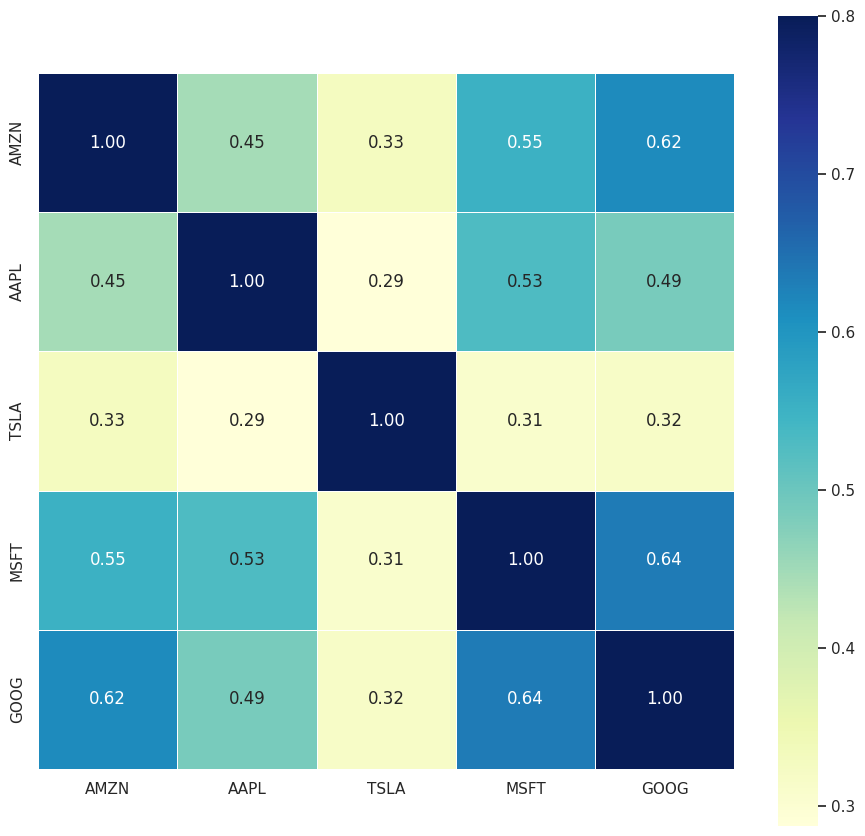

In [ ]:
plt.figure(figsize=(10, 10))
sns.heatmap(data = returns.corr(), vmax=.8, linewidths=0.5,  fmt='.2f',
            square=True,annot=True,cmap='YlGnBu',linecolor="white")
plt.show()

#### ANÁLISIS INDIVIDUAL DE LAS ACCIONES DE APPLE

Por limitaciones de computación y la naturaleza del trabajo solo analizamos esta compañía pues el procesamiento de los tweets para más compañías requiere de unos tiempos de computación muy altos y no es necesario para los objetivos del trabajo.

In [ ]:
def pandas_candlestick_ohlc(dat, stick = "day", otherseries = None):
    """
    Japanese candlestick chart showing OHLC prices for a specified time period
    
    :param dat: pandas dataframe object with datetime64 index, and float columns "Open", "High", "Low", and "Close"
    :param stick: A string or number indicating the period of time covered by a single candlestick. Valid string inputs include "day", "week", "month", and "year", ("day" default), and any numeric input indicates the number of trading days included in a period
    :param otherseries: An iterable that will be coerced into a list, containing the columns of dat that hold other series to be plotted as lines
 
    :returns: a Japanese candlestick plot for stock data stored in dat, also plotting other series if passed.
    """
    mondays = WeekdayLocator(MONDAY)        # major ticks on the mondays
    alldays = DayLocator()              # minor ticks on the days
    dayFormatter = DateFormatter('%d')      # e.g., 12
 
    # Create a new DataFrame which includes OHLC data for each period specified by stick input
    transdat = dat.loc[:,["Open", "High", "Low", "Close"]]
    if (type(stick) == str):
        if stick == "day":
            plotdat = transdat
            stick = 1 # Used for plotting
        elif stick in ["week", "month", "year"]:
            if stick == "week":
                transdat["week"] = pd.to_datetime(transdat.index).map(lambda x: x.isocalendar()[1]) # Identify weeks
            elif stick == "month":
                transdat["month"] = pd.to_datetime(transdat.index).map(lambda x: x.month) # Identify months
            transdat["year"] = pd.to_datetime(transdat.index).map(lambda x: x.isocalendar()[0]) # Identify years
            grouped = transdat.groupby(list(set(["year",stick]))) # Group by year and other appropriate variable
            plotdat = pd.DataFrame({"Open": [], "High": [], "Low": [], "Close": []}) # Create empty data frame containing what will be plotted
            for name, group in grouped:
                plotdat = plotdat.append(pd.DataFrame({"Open": group.iloc[0,0],
                                            "High": max(group.High),
                                            "Low": min(group.Low),
                                            "Close": group.iloc[-1,3]},
                                           index = [group.index[0]]))
            if stick == "week": stick = 5
            elif stick == "month": stick = 30
            elif stick == "year": stick = 365
 
    elif (type(stick) == int and stick >= 1):
        transdat["stick"] = [np.floor(i / stick) for i in range(len(transdat.index))]
        grouped = transdat.groupby("stick")
        plotdat = pd.DataFrame({"Open": [], "High": [], "Low": [], "Close": []}) # Create empty data frame containing what will be plotted
        for name, group in grouped:
            plotdat = plotdat.append(pd.DataFrame({"Open": group.iloc[0,0],
                                        "High": max(group.High),
                                        "Low": min(group.Low),
                                        "Close": group.iloc[-1,3]},
                                       index = [group.index[0]]))
 
    else:
        raise ValueError('Valid inputs to argument "stick" include the strings "day", "week", "month", "year", or a positive integer')
 
 
    # Set plot parameters, including the axis object ax used for plotting
    fig, ax = plt.subplots()
    fig.subplots_adjust(bottom=0.2)
    if plotdat.index[-1] - plotdat.index[0] < pd.Timedelta('730 days'):
        weekFormatter = DateFormatter('%b %d')  # e.g., Jan 12
        ax.xaxis.set_major_locator(mondays)
        ax.xaxis.set_minor_locator(alldays)
    else:
        weekFormatter = DateFormatter('%b %d, %Y')
    ax.xaxis.set_major_formatter(weekFormatter)
 
    ax.grid(True)
 
    # Create the candelstick chart
    candlestick_ohlc(ax, list(zip(list(date2num(plotdat.index.tolist())), plotdat["Open"].tolist(), plotdat["High"].tolist(),
                      plotdat["Low"].tolist(), plotdat["Close"].tolist())),
                      colorup = "green", colordown = "red", width = stick * .4)
 
    # Plot other series (such as moving averages) as lines
    if otherseries != None:
        if type(otherseries) != list:
            otherseries = [otherseries]
        dat.loc[:,otherseries].plot(ax = ax, lw = 1.3, grid = True)
 
    ax.xaxis_date()
    ax.autoscale_view()
    plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
    sns.set(rc={'figure.figsize':(20, 10)})
    plt.style.use('seaborn-whitegrid')
    plt.title(f"Candlestick chart of {txt}", color = 'black', fontsize = 20)
    plt.xlabel('Date', color = 'black', fontsize = 15)
    plt.ylabel('Stock Price (p)', color = 'black', fontsize = 15);
 
    plt.show()

In [ ]:
AAPL

,Open,High,Low,Close,Adj Close,Volume,company_name,ticker
Date,,,,,,,,
2014-01-02,19.845715,19.893929,19.715000,19.754642,17.364958,234684800,APPLE,AAPL
2014-01-03,19.745001,19.775000,19.301071,19.320715,16.983524,392467600,APPLE,AAPL
2014-01-06,19.194643,19.528570,19.057142,19.426071,17.076143,412610800,APPLE,AAPL
2014-01-07,19.440001,19.498571,19.211430,19.287144,16.954014,317209200,APPLE,AAPL
2014-01-08,19.243214,19.484285,19.238930,19.409286,17.061380,258529600,APPLE,AAPL
...,...,...,...,...,...,...,...,...
2019-12-23,70.132500,71.062500,70.092499,71.000000,69.355133,98572000,APPLE,AAPL
2019-12-24,71.172501,71.222504,70.730003,71.067497,69.421066,48478800,APPLE,AAPL
2019-12-26,71.205002,72.495003,71.175003,72.477501,70.798409,93121200,APPLE,AAPL


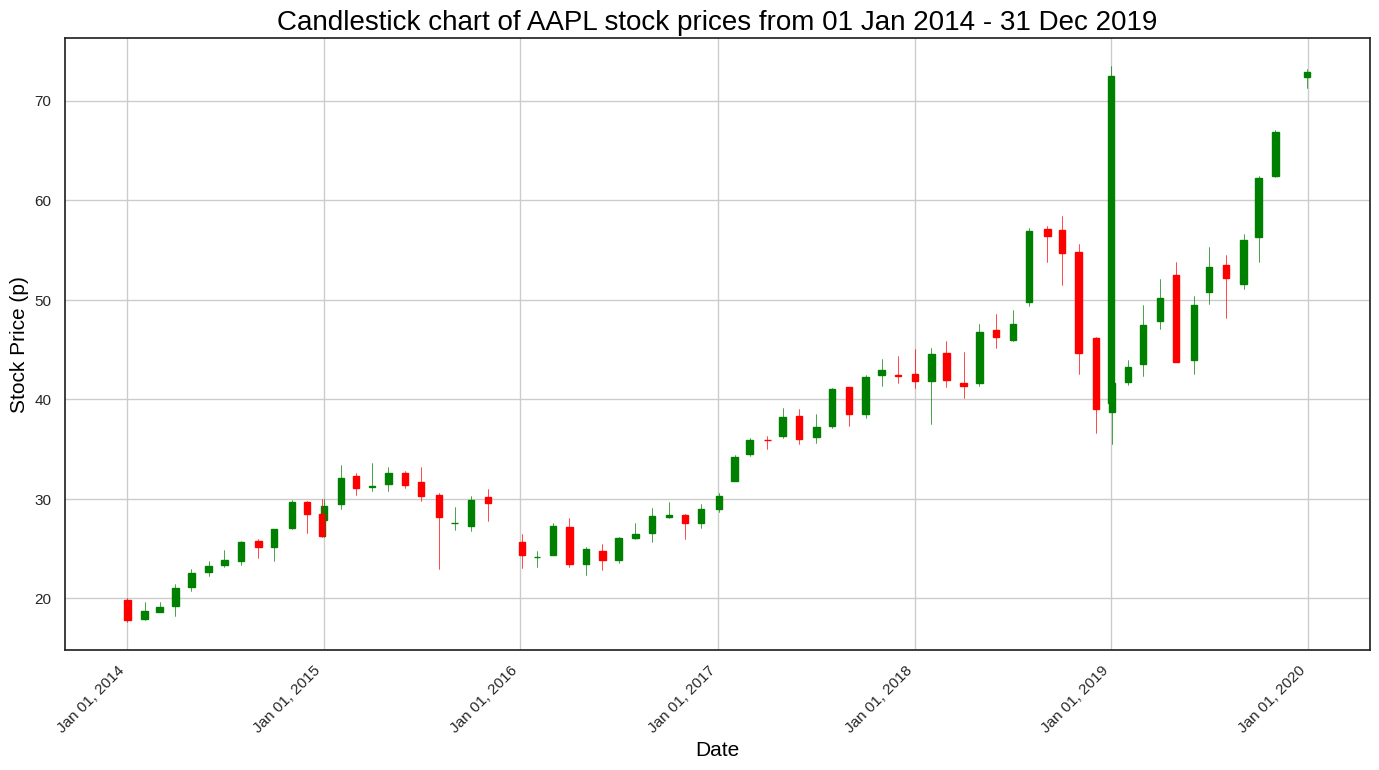

In [ ]:
txt = "AAPL stock prices from 01 Jan 2014 - 31 Dec 2019"

pandas_candlestick_ohlc(AAPL, stick="month")

In [ ]:
def sma2():
  plt.figure(figsize=(15,9))
  AAPL['Adj Close'].loc['2014-01-01':'2019-12-31'].rolling(window=5).mean().plot(label='5 Day Avg')
  AAPL['Adj Close'].loc['2014-01-01':'2019-12-31'].rolling(window=20).mean().plot(label='20 Day Avg')
  AAPL['Adj Close'].loc['2014-01-01':'2019-12-31'].rolling(window=200).mean().plot(label='200 Day Avg')
  AAPL['Adj Close'].loc['2014-01-01':'2019-12-31'].plot(label=f"{label_txt}")
  plt.title(f"{title_txt}", color = 'black', fontsize = 20)
  plt.xlabel('Date', color = 'black', fontsize = 15)
  plt.ylabel('Stock Price (p)', color = 'black', fontsize = 15);
  plt.legend()

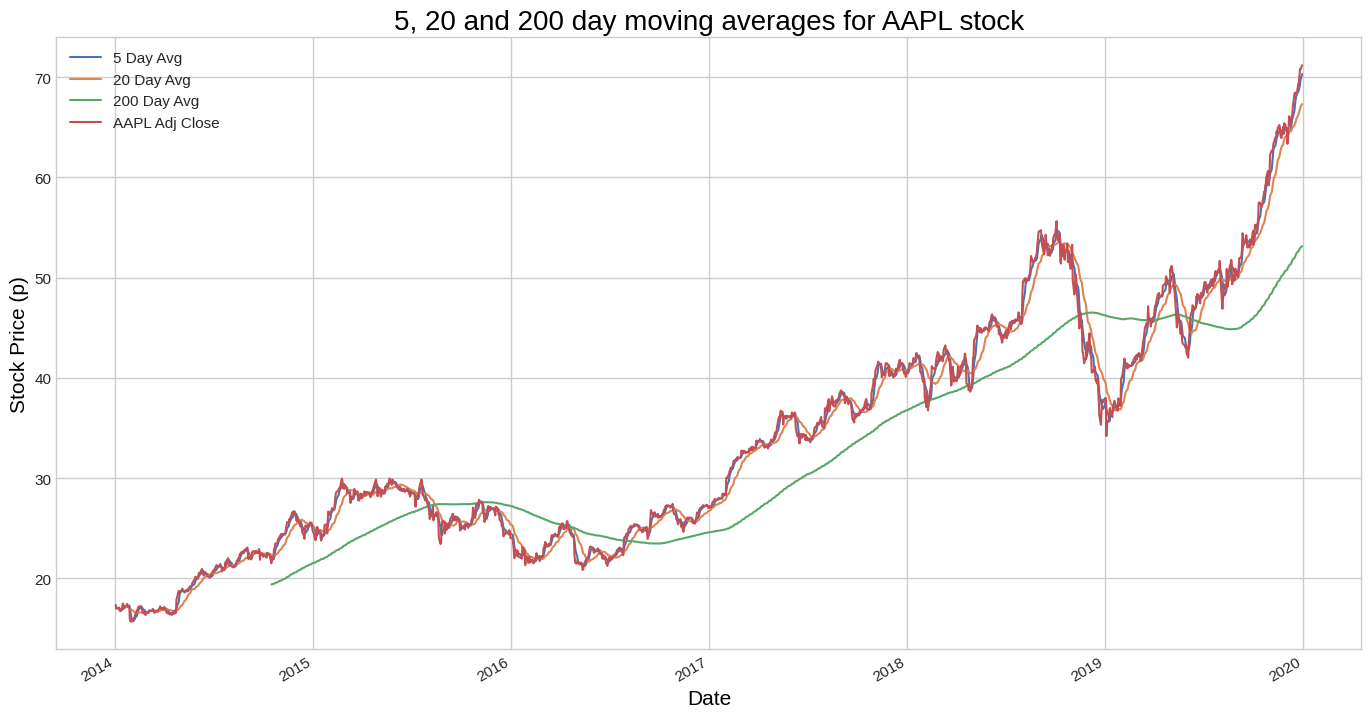

In [ ]:
title_txt = "5, 20 and 200 day moving averages for AAPL stock"
label_txt = "AAPL Adj Close"

sma2()

## Base Final unida

In [ ]:
final_stocks_df[final_stocks_df['ticker'] == 'AAPL']

,level_0,index,date,Open,High,Low,Close,Adj Close,Volume,company_name,ticker,MA5,MA10,MA200,MA300,macd,signal,rsi
0,0,0,2014-01-02,19.845715,19.893929,19.715000,19.754642,17.364958,234684800,APPLE,AAPL,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN
8,8,1,2014-01-03,19.745001,19.775000,19.301071,19.320715,16.983524,392467600,APPLE,AAPL,22.716245,NaN,NaN,NaN,1.008051,0.990823,47.734065
14,11,2,2014-01-06,19.194643,19.528570,19.057142,19.426071,17.076143,412610800,APPLE,AAPL,22.573253,22.641149,NaN,NaN,0.311484,0.487890,49.163684
18,18,3,2014-01-07,19.440001,19.498571,19.211430,19.287144,16.954014,317209200,APPLE,AAPL,24.677979,22.680075,NaN,NaN,1.058911,0.815960,47.601417
23,23,4,2014-01-08,19.243214,19.484285,19.238930,19.409286,17.061380,258529600,APPLE,AAPL,19.061590,21.869785,NaN,NaN,-0.365454,0.246283,49.966023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7523,7523,1504,2019-12-23,70.132500,71.062500,70.092499,71.000000,69.355133,98572000,APPLE,AAPL,108.582402,82.355184,79.206381,76.758286,2.287385,1.974959,48.969172
7529,7527,1505,2019-12-24,71.172501,71.222504,70.730003,71.067497,69.421066,48478800,APPLE,AAPL,82.687201,82.688601,78.801382,76.745905,0.556570,-0.660179,50.021611
7532,7532,1506,2019-12-26,71.205002,72.495003,71.175003,72.477501,70.798409,93121200,APPLE,AAPL,105.523000,81.155150,79.162008,77.065846,2.311259,1.611494,49.382496
7538,7537,1507,2019-12-27,72.779999,73.492500,72.029999,72.449997,70.771530,146266000,APPLE,AAPL,84.227000,82.009933,79.219089,77.335980,-2.052380,-0.004111,50.491038


In [ ]:
tweets_aapl_final

,ticker,date,tweet_volume,sentiment_score
0,AAPL,2015-01-01,299,0.149022
1,AAPL,2015-01-02,867,0.112948
2,AAPL,2015-01-03,346,0.297905
3,AAPL,2015-01-04,406,0.239043
4,AAPL,2015-01-05,1147,0.161437
...,...,...,...,...
1814,AAPL,2019-12-27,381,0.218814
1815,AAPL,2019-12-28,210,0.157038
1816,AAPL,2019-12-29,190,0.163587
1817,AAPL,2019-12-30,732,0.244986


In [ ]:
base_final = tweets_aapl_final.merge(final_stocks_df, on=['date', 'ticker'], how='left').drop(['level_0','index'],axis=1)
base_final

,ticker,date,tweet_volume,sentiment_score,Open,High,Low,Close,Adj Close,Volume,company_name,MA5,MA10,MA200,MA300,macd,signal,rsi
0,AAPL,2015-01-01,299,0.149022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AAPL,2015-01-02,867,0.112948,27.847500,27.860001,26.837500,27.332500,24.531761,212818400.0,APPLE,21.977452,27.222798,26.811366,26.400830,-0.828507,-0.369100,53.086170
2,AAPL,2015-01-03,346,0.297905,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AAPL,2015-01-04,406,0.239043,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AAPL,2015-01-05,1147,0.161437,27.072500,27.162500,26.352501,26.562500,23.840664,257142000.0,APPLE,25.896230,23.936841,26.633268,26.358892,-0.759469,-0.380874,52.048534
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1814,AAPL,2019-12-27,381,0.218814,72.779999,73.492500,72.029999,72.449997,70.771530,146266000.0,APPLE,84.227000,82.009933,79.219089,77.335980,-2.052380,-0.004111,50.491038
1815,AAPL,2019-12-28,210,0.157038,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1816,AAPL,2019-12-29,190,0.163587,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1817,AAPL,2019-12-30,732,0.244986,72.364998,73.172501,71.305000,72.879997,71.191589,144114400.0,APPLE,67.021298,75.673183,79.294991,77.243741,-1.397698,-0.405108,50.153073


In [ ]:
base_final.dropna(inplace=True)

In [ ]:
base_final

,ticker,date,tweet_volume,sentiment_score,Open,High,Low,Close,Adj Close,Volume,company_name,MA5,MA10,MA200,MA300,macd,signal,rsi
1,AAPL,2015-01-02,867,0.112948,27.847500,27.860001,26.837500,27.332500,24.531761,212818400.0,APPLE,21.977452,27.222798,26.811366,26.400830,-0.828507,-0.369100,53.086170
4,AAPL,2015-01-05,1147,0.161437,27.072500,27.162500,26.352501,26.562500,23.840664,257142000.0,APPLE,25.896230,23.936841,26.633268,26.358892,-0.759469,-0.380874,52.048534
5,AAPL,2015-01-06,1190,0.201946,26.635000,26.857500,26.157499,26.565001,23.842909,263188400.0,APPLE,25.067123,25.438677,26.852919,26.426439,-0.167138,0.155888,51.199745
6,AAPL,2015-01-07,1094,0.155557,26.799999,27.049999,26.674999,26.937500,24.177238,160423600.0,APPLE,19.450266,24.235195,26.508223,26.256669,-1.720431,-0.992612,53.761358
7,AAPL,2015-01-08,1495,0.176046,27.307501,28.037500,27.174999,27.972500,25.106186,237458000.0,APPLE,32.164047,25.807157,26.803957,26.404157,0.804958,0.195225,51.868682
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1810,AAPL,2019-12-23,595,0.218955,70.132500,71.062500,70.092499,71.000000,69.355133,98572000.0,APPLE,108.582402,82.355184,79.206381,76.758286,2.287385,1.974959,48.969172
1811,AAPL,2019-12-24,352,0.275088,71.172501,71.222504,70.730003,71.067497,69.421066,48478800.0,APPLE,82.687201,82.688601,78.801382,76.745905,0.556570,-0.660179,50.021611
1813,AAPL,2019-12-26,691,0.225388,71.205002,72.495003,71.175003,72.477501,70.798409,93121200.0,APPLE,105.523000,81.155150,79.162008,77.065846,2.311259,1.611494,49.382496
1814,AAPL,2019-12-27,381,0.218814,72.779999,73.492500,72.029999,72.449997,70.771530,146266000.0,APPLE,84.227000,82.009933,79.219089,77.335980,-2.052380,-0.004111,50.491038


# Algoritmos clasificación

In [ ]:
base_final_2 = base_final.copy()

In [ ]:
base_final_2['ema300'] = base_final_2['Adj Close'] / base_final_2['Adj Close'].ewm(300).mean()
base_final_2['ema100'] = base_final_2['Adj Close'] / base_final_2['Adj Close'].ewm(100).mean()
base_final_2['ema10'] = base_final_2['Adj Close'] / base_final_2['Adj Close'].ewm(10).mean()
base_final_2['ema5'] = base_final_2['Adj Close'] / base_final_2['Adj Close'].ewm(5).mean()


base_final_2

,ticker,date,tweet_volume,sentiment_score,Open,High,Low,Close,Adj Close,Volume,...,MA10,MA200,MA300,macd,signal,rsi,ema300,ema100,ema10,ema5
1,AAPL,2015-01-02,867,0.112948,27.847500,27.860001,26.837500,27.332500,24.531761,212818400.0,...,27.222798,26.811366,26.400830,-0.828507,-0.369100,53.086170,1.000000,1.000000,1.000000,1.000000
4,AAPL,2015-01-05,1147,0.161437,27.072500,27.162500,26.352501,26.562500,23.840664,257142000.0,...,23.936841,26.633268,26.358892,-0.759469,-0.380874,52.048534,0.985736,0.985783,0.986384,0.986995
5,AAPL,2015-01-06,1190,0.201946,26.635000,26.857500,26.157499,26.565001,23.842909,263188400.0,...,25.438677,26.852919,26.426439,-0.167138,0.155888,51.199745,0.990524,0.990586,0.991378,0.992156
6,AAPL,2015-01-07,1094,0.155557,26.799999,27.049999,26.674999,26.937500,24.177238,160423600.0,...,24.235195,26.508223,26.256669,-1.720431,-0.992612,53.761358,1.003301,1.003337,1.003759,1.004107
7,AAPL,2015-01-08,1495,0.176046,27.307501,28.037500,27.174999,27.972500,25.106186,237458000.0,...,25.807157,26.803957,26.404157,0.804958,0.195225,51.868682,1.033145,1.033060,1.031852,1.030430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1810,AAPL,2019-12-23,595,0.218955,70.132500,71.062500,70.092499,71.000000,69.355133,98572000.0,...,82.355184,79.206381,76.758286,2.287385,1.974959,48.969172,1.480635,1.271083,1.044224,1.026053
1811,AAPL,2019-12-24,352,0.275088,71.172501,71.222504,70.730003,71.067497,69.421066,48478800.0,...,82.688601,78.801382,76.745905,0.556570,-0.660179,50.021611,1.479636,1.268871,1.040938,1.022423
1813,AAPL,2019-12-26,691,0.225388,71.205002,72.495003,71.175003,72.477501,70.798409,93121200.0,...,81.155150,79.162008,77.065846,2.311259,1.611494,49.382496,1.506405,1.290289,1.055680,1.035338
1814,AAPL,2019-12-27,381,0.218814,72.779999,73.492500,72.029999,72.449997,70.771530,146266000.0,...,82.009933,79.219089,77.335980,-2.052380,-0.004111,50.491038,1.503267,1.286109,1.050002,1.028952


In [ ]:
def buy_sell_pred(data, forecast_out):
    
    data['Ndaysahead'] = data.shift(-forecast_out)['Adj Close']
    
    prediction = np.where((((data['Ndaysahead'] - data['Adj Close'])/data['Adj Close']) > 0.005) 
                          & (data['Ndaysahead'] > data['Adj Close']), 2.0, 1.0)
    prediction = np.where((((data['Ndaysahead'] - data['Adj Close'])/data['Adj Close']) < -0.005) 
                          & (data['Ndaysahead'] < data['Adj Close']), 0.0, prediction)

    data['Prediction'] = prediction

    return data

base_final_2 = buy_sell_pred(base_final_2, forecast_out=1)
del (base_final_2['Ndaysahead'])
#del (base_final_2['Adj Close'])
base_final_2 = base_final_2.dropna()
base_final_2.head(30)

,ticker,date,tweet_volume,sentiment_score,Open,High,Low,Close,Adj Close,Volume,...,MA200,MA300,macd,signal,rsi,ema300,ema100,ema10,ema5,Prediction
1,AAPL,2015-01-02,867,0.112948,27.847500,27.860001,26.837500,27.332500,24.531761,212818400.0,...,26.811366,26.400830,-0.828507,-0.369100,53.086170,1.000000,1.000000,1.000000,1.000000,0.0
4,AAPL,2015-01-05,1147,0.161437,27.072500,27.162500,26.352501,26.562500,23.840664,257142000.0,...,26.633268,26.358892,-0.759469,-0.380874,52.048534,0.985736,0.985783,0.986384,0.986995,1.0
5,AAPL,2015-01-06,1190,0.201946,26.635000,26.857500,26.157499,26.565001,23.842909,263188400.0,...,26.852919,26.426439,-0.167138,0.155888,51.199745,0.990524,0.990586,0.991378,0.992156,2.0
6,AAPL,2015-01-07,1094,0.155557,26.799999,27.049999,26.674999,26.937500,24.177238,160423600.0,...,26.508223,26.256669,-1.720431,-0.992612,53.761358,1.003301,1.003337,1.003759,1.004107,2.0
7,AAPL,2015-01-08,1495,0.176046,27.307501,28.037500,27.174999,27.972500,25.106186,237458000.0,...,26.803957,26.404157,0.804958,0.195225,51.868682,1.033145,1.033060,1.031852,1.030430,1.0
8,AAPL,2015-01-09,1122,0.157225,28.167500,28.312500,27.552500,28.002501,25.133116,214798000.0,...,26.626798,26.407465,-0.182185,0.064859,52.572205,1.028333,1.028166,1.025901,1.023448,0.0
11,AAPL,2015-01-12,942,0.145311,28.150000,28.157499,27.200001,27.312500,24.513817,198603200.0,...,26.586438,26.452743,0.395538,-0.206271,52.002384,1.002561,1.002414,1.000506,0.998638,2.0
12,AAPL,2015-01-13,1372,0.202283,27.857500,28.200001,27.227501,27.555000,24.731464,268367600.0,...,26.585010,26.455670,-0.215575,-0.102096,52.905115,1.009999,1.009835,1.007777,1.005865,1.0
13,AAPL,2015-01-14,949,0.140474,27.260000,27.622499,27.125000,27.450001,24.637228,195826400.0,...,26.480128,26.438270,0.390161,-0.252237,52.277682,1.005454,1.005292,1.003313,1.001612,0.0
14,AAPL,2015-01-15,1144,0.089964,27.500000,27.514999,26.665001,26.705000,23.968567,240056000.0,...,26.351108,26.476687,0.010251,-0.037222,51.866996,0.980338,0.980262,0.979549,0.979406,0.0


In [ ]:
base_final_2=base_final_2.drop(['ticker','date','company_name'],axis=1)

In [ ]:
base_final_2['Prediction'].value_counts()

2.0    465
1.0    437
0.0    352
Name: Prediction, dtype: int64

In [ ]:
X = base_final_2.drop(['Prediction'], 1)
y = base_final_2.Prediction

In [ ]:
tscv = TimeSeriesSplit(n_splits=4)

In [ ]:
for train_index, test_index in tscv.split(X):
    # Split into training and test sets
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    print(f'Train is from {X.iloc[train_index].index.min()} to {X.iloc[train_index].index.max()}. ')
    print(f'Test is from {X.iloc[test_index].index.min()} to {X.iloc[test_index].index.max()}. ')
    print("")

Train is from 1 to 365. 
Test is from 368 to 728. 

Train is from 1 to 728. 
Test is from 729 to 1091. 

Train is from 1 to 1091. 
Test is from 1092 to 1455. 

Train is from 1 to 1455. 
Test is from 1456 to 1817. 



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(877, 19)
(877,)
(377, 19)
(377,)


In [ ]:
# Gradient Boost
gradientboost  = Pipeline([('scale', StandardScaler()), ('clf', GradientBoostingClassifier())])

# Random Forest
randomforest  = Pipeline([('scale', StandardScaler()), ('clf', RandomForestClassifier())])

# Decision Tree
decisiontree  = Pipeline([('scale', StandardScaler()), ('clf', DecisionTreeClassifier())])

# Dummy (Baseline)
baseline = Pipeline([('scale', StandardScaler()), ('clf', DummyClassifier())])

# K Nearest Neighbors
knn = Pipeline([('scale', StandardScaler()), ('clf', KNeighborsClassifier())])

# Logistic Regression
logistic  = Pipeline([('scale', StandardScaler()), ('clf', LogisticRegression())])

# Naive Bayes
naivebayes  = Pipeline([('scale', StandardScaler()), ('clf', GaussianNB())])

# Support Vector Machine
supportvect = Pipeline([('scale', StandardScaler()), ('clf', SVC())])

# XGBoost
xgboost = Pipeline([('scale', StandardScaler()), ('clf', XGBClassifier())])

In [ ]:
pipelines = [gradientboost, randomforest, decisiontree, baseline, 
             knn, logistic, naivebayes, supportvect, xgboost]

models = ['GradientBoost', 
          'RandomForest', 
          'DecisionTree', 
          'Dummy(Baseline)', 
          'KNN', 
          'LogisticRegression',
          'NaiveBayes',
          'SupportVectorMachine',
          'XGBoost']

# Zipping the strings and pipelines together and creating a dictionary
pipedict = dict(zip(models, pipelines))

In [ ]:
# Looping through each Pipeline to fit and train each model
for name, pipe in pipedict.items():
    print(name)
    print(pipe)
    pipe.fit(X_train, y_train)

GradientBoost
Pipeline(steps=[('scale', StandardScaler()),
                ('clf', GradientBoostingClassifier())])
RandomForest
Pipeline(steps=[('scale', StandardScaler()), ('clf', RandomForestClassifier())])
DecisionTree
Pipeline(steps=[('scale', StandardScaler()), ('clf', DecisionTreeClassifier())])
Dummy(Baseline)
Pipeline(steps=[('scale', StandardScaler()), ('clf', DummyClassifier())])
KNN
Pipeline(steps=[('scale', StandardScaler()), ('clf', KNeighborsClassifier())])
LogisticRegression
Pipeline(steps=[('scale', StandardScaler()), ('clf', LogisticRegression())])
NaiveBayes
Pipeline(steps=[('scale', StandardScaler()), ('clf', GaussianNB())])
SupportVectorMachine
Pipeline(steps=[('scale', StandardScaler()), ('clf', SVC())])
XGBoost
Pipeline(steps=[('scale', StandardScaler()),
                ('clf',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               c

In [ ]:
# Dictionary containing the model names and their scores 
models_acc = {}

# Looping through each model's predictions and getting their classification reports
for name, pipe in pipedict.items():
    print('\n'+ name + ' (Accuracy Score):')
    
    # Classification Report
    report = classification_report(y_test, pipe.predict(X_test), target_names=['Sell', 'Neutral','Buy'], output_dict=True)
    acc = report['accuracy']
    
    # Assigning to the Dictionary
    models_acc[name] = acc
    
    print(acc) 


GradientBoost (Accuracy Score):
0.35809018567639256

RandomForest (Accuracy Score):
0.363395225464191

DecisionTree (Accuracy Score):
0.3421750663129973

Dummy(Baseline) (Accuracy Score):
0.3076923076923077

KNN (Accuracy Score):
0.3660477453580902

LogisticRegression (Accuracy Score):
0.3978779840848806

NaiveBayes (Accuracy Score):
0.38992042440318303

SupportVectorMachine (Accuracy Score):
0.40848806366047746

XGBoost (Accuracy Score):
0.3713527851458886


In [ ]:
# Top 3 Models
for i in sorted(models_acc, key=models_acc.get, reverse=True)[:5]:
    print(i, models_acc[i])

SupportVectorMachine 0.40848806366047746
LogisticRegression 0.3978779840848806
NaiveBayes 0.38992042440318303
XGBoost 0.3713527851458886
KNN 0.3660477453580902


In [ ]:
# Definimos los parámetros sobre los que iterarán los modelos

sv_params = {'clf__n_estimators': np.arange(10,300,10), #[50, 100],
              'clf__learning_rate': [0.01,0.05,0.1,0.3,1]}

nb_params = {"clf__var_smoothing": [1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10, 1e-11, 1e-12, 1e-13, 1e-14, 1e-15]}

#gb_params = {"clf__n_estimators":[5,50,250,500],
#             "clf__max_depth":[1,3,5,7,9],
#             "clf__learning_rate":[0.01,0.1,1,10,100]}

#knn_params = {'clf__n_neighbours': np.arange(1,40,1)}

knn_params = {}

In [ ]:
# Generamos un diccionario para los tres mejores modelos con sus respectivos parámetros
top3 = {'SupportVectorMachine': [supportvect, sv_params],
        'LogisticRegression': [logistic, log_params],
        'NaiveBayes': [naivebayes, nb_params]}

In [ ]:
# Diccionario de mejores estimadores 
best_estimators = {}

# Grid Search
for name, vals in top3.items():
    print(name + ' -'*30)
    
    gs = GridSearchCV(vals[0], vals[1] , cv=tscv, return_train_score=True, verbose=2, scoring='accuracy')
    gs.fit(X_train, y_train)

    print(name+' Best Parameters: ', gs.best_params_)
    
    best_estimators[name+'_clf'] = gs.best_estimator_

SupportVectorMachine - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Fitting 4 folds for each of 145 candidates, totalling 580 fits


ValueError: ignored

A continuación con los mejores modelos y los mejores parámetros disponibles, computamos los resultados de la clasificación multiclase estimada. Comprobamos que en general los resultados siguen siendo pobres.

In [ ]:


for name, pipe in best_estimators.items():
    print('\nTuned '+ name + ' (Accuracy Score):')
    
    report = classification_report(y_test, pipe.predict(X_test), target_names=['Sell', 'Buy'], output_dict=True)
    print(report['accuracy'])

In [ ]:
#Tuneamos la matriz de confusión para nuestro caso.

def plot_confusion_matrix(y_true, y_pred, labels=["Sell","Neutral", "Buy"], 
                          normalize=False, title=None, cmap=plt.cm.coolwarm):

    cm = confusion_matrix(y_true, y_pred)
    fig, ax = plt.subplots(figsize=(12,6))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=labels, yticklabels=labels,
           title=title,
           ylabel='ACTUAL',
           xlabel='PREDICTED')
    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 1.5
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="snow" if cm[i, j] > thresh else "orange",
                    size=26)
    ax.grid(False)
    fig.tight_layout()
    return ax

Mostramos a continuación los resultados de clasificación para Naive Bayes. El resto de matrices de confución se obtienen de idéntico modo.

In [ ]:
# Plot confusion matrix
plot_confusion_matrix(y_test, best_estimators['NaiveBayes_clf'].predict(X_test), title="Confusion Matrix")
np.set_printoptions(precision=1)
plt.show()

# Final Classification Report
print(classification_report(y_test, best_estimators['NaiveBayes_clf'].predict(X_test), target_names=['Sell', 'Buy']))

### Artificial Neural Network (ANN) para clasicación

Ahora vamos a intentar usar una Artificial Neural Network (ANN) para clasificar si el precio ha subido o ha bajado y veremos si se obtienen mejores resultados que con otros modelos de clasificacion, como los anteriores, vistos en clase.



In [ ]:
#ARTIFICIAL NEURAL NETWORK

#Usamos la misma base usada en esta seccion de clasificación para clasificar usando ANN

X = base_final_2.drop(['Prediction'], 1)
y = base_final_2.Prediction

# Splitting the dataset into the Training set and Test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Feature Scaling

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 20, kernel_initializer = 'uniform', activation = 'relu', input_dim = 20))

# Adding the second hidden layer
classifier.add(Dense(units = 20, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size = 32, epochs = 100)

#Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm

Como puede comprobarse, los resultados son algo mejores que los obtenidos mediante los algoritmos anteriores, aunque las redes neuronales tienen el inconveniente de que su interpretabilidad es prácticamente inviable para niveles de complejidad muy humildes.

# Algoritmos regresión

In [ ]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, BaggingRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
base_final_3 = base_final.copy()

#base_final_3=base_final_3.drop(['ticker','date','company_name','Close','High', 'Low'],axis=1)
#base_final_3=base_final_3.drop(['ticker','date','company_name','Close','High', 'Low','Open'],axis=1)
# base_final_3=base_final_3.drop(['ticker','date','company_name','Close','High', 'Low','Open','MA5','MA10','MA200','MA300','macd','signal','rsi','Volume'],axis=1) # sin MA nos sale R^2 por debajo del 0.6
base_final_3=base_final_3.drop(['ticker','date','company_name','Close','High','Open', 'Low','macd','signal','rsi'],axis=1) # con tweets y MA sale bastante bien

base_final_3

In [ ]:
X = base_final_3.drop(['Adj Close'], 1)
y = base_final_3['Adj Close']

In [ ]:
X

In [ ]:
# aplicar scaler para los algoritmos de regresión (algunos como MLP son muy sensibles)
scaler = RobustScaler()

# Apply the scaling to X
X_scaled = scaler.fit_transform(X)

# Create a new dataframe with the scaled X values
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

In [ ]:
X = X_scaled_df

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
# ALGORITMOS DE REGRESIÓN
models = {}
models["Linear"] = LinearRegression()
models["Ridge"] = Ridge()
models["KNN"] = KNeighborsRegressor()
models["DecisionTree"] = DecisionTreeRegressor()
models["GradientBoost"] = GradientBoostingRegressor()
models["RandomForest"] = RandomForestRegressor()
models["BaggingRegressor"] = BaggingRegressor()
models["XGBRegressor"] = XGBRegressor(objective ='reg:squarederror')
models["MLPRegressor"] = MLPRegressor(solver = 'lbfgs')

In [ ]:
model_results = []  
model_names   = []
for model_name in models:
    model = models[model_name]
    # TimeSeries Cross validation
    tscv = TimeSeriesSplit(n_splits=7)
    
    cv_results = cross_val_score(model, X_train, y_train, cv=tscv, scoring='r2')
    model_results.append(cv_results)
    model_names.append(model_name)
    print("{}: {}, ({})".format(model_name, round(cv_results.mean(), 6), round(cv_results.std(), 6)))
     


In [ ]:
# BOXPLOT PARA COMPARAR R cuadrado


def box_compare():
  sns.set(rc={'figure.figsize':(15, 9)})
  sns.set_style(style='whitegrid', )
  figure = plt.figure()
  plt.title('Regression models comparison', color = 'black', fontsize = 20)
  axis = figure.add_subplot(111)
  plt.boxplot(model_results)
  axis.set_xticklabels(model_names, rotation = 45, ha="right")
  axis.set_ylabel("R^2 score")
  plt.margins(0.05, 0.1)

box_compare()

In [ ]:
from sklearn.metrics import mean_squared_error, make_scorer

scoring = make_scorer(mean_squared_error, greater_is_better=False)
model_results = []
model_names = []

for model_name in models:
    model = models[model_name]
    tscv = TimeSeriesSplit(n_splits=7)
    cv_results = cross_val_score(model, X_train, y_train, cv=tscv, scoring=scoring)
    model_results.append(cv_results)
    model_names.append(model_name)
    print("{}: {}, ({})".format(model_name, -cv_results.mean(), cv_results.std()))

In [ ]:
# BOXPLOT PARA COMPARAR MSE


def box_compare():
  sns.set(rc={'figure.figsize':(15, 9)})
  sns.set_style(style='whitegrid')
  figure = plt.figure()
  plt.title('Regression models comparison', color='black', fontsize=20)
  axis = figure.add_subplot(111)
  # Convert negative MSE results to positive
  mse_results = [-result for result in model_results]
  plt.boxplot(mse_results)
  axis.set_xticklabels(model_names, rotation=45, ha="right")
  axis.set_ylabel("MSE")
  plt.margins(0.05, 0.1)

box_compare()

## Análisis de Regresión con Multi Layer Percepton

In [ ]:
# Create an MLP Regressor model  
mlpr = MLPRegressor(max_iter=500, solver = 'lbfgs')

# Train the model using the training sets
mlpr.fit(X_train, y_train)
mlpr

In [ ]:
y_pred = mlpr.predict(X_test)

In [ ]:
# The mean squared error
print('RMSE: {}'.format(round(mean_squared_error(y_test, y_pred, squared=False), 3)))
# Explained variance score: 1 is perfect prediction, 0 is random
print('R^2 score: {}'.format(round(r2_score(y_test, y_pred), 3)))

In [ ]:
# Plot predictions against actual Adjusted Close prices 

x_axis = np.array(range(0, y_pred.shape[0]))
plt.plot(x_axis, y_test, color='g', label="actual")
plt.plot(x_axis, y_pred, color='r', label="predictions")
plt.xlabel('Time periods')
plt.ylabel('Adjusted Close price')
plt.title('MLP Regressor - Predictions vs Actual Prices')
plt.legend(loc='lower right')
plt.show()

In [ ]:
pd.DataFrame({"Actual": y_test, "Predict": y_pred})

In [ ]:

# create basic scatterplot
plt.scatter(y_test,y_pred)

# obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(y_test, y_pred, 1)

# add linear regression line to scatterplot 
plt.plot(y_test, m*y_test+b, c='r')

plt.xlabel("Prices: ")
plt.ylabel("Predicted prices: ")
plt.title("Prices vs Predicted prices: vs ")
plt.show()

# Redes Neuronales (LSTM)

1-LSTM con sentimientos
2-LSTM solo con precios



In [ ]:
!pip install hvplot

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import hvplot.pandas

## LSTM con sentiment score

Ahora vamos a utilizar un modelo LSTM que básicamente son redes neuronales recurrentes (RNN) que amplían su memoria para aprender de experiencias importantes que han pasado hace mucho tiempo, esto permite que las RNN recuerden sus entradas durante un largo periodo de tiempo.
Vamos a usarlas ya que estamos intentando predecir el precio del mercado de valores y eventos pasados o tendencia similares pasadas pueden darse en el presente así que creemos que pueden ser de utilidad.
Primero construiremos un modelo que usar el precio, el sentimiento extraído de los tweets y el volumen de estos para predecir el precio ya que son las variables a través de las cuales estamos intentando predecir el precio.

Para ello crearemos listas de estas variables que puedan contener valores pasados (windows) escalaremos y ajustaremos los datos, construiremos

In [ ]:
base_final_4 = base_final.copy()
base_final_4=base_final_4.drop(['ticker','company_name'],axis=1)
base_final_4

In [ ]:
base_final_4.set_index('date', inplace=True)
base_final_4 = base_final_4[["Adj Close", "sentiment_score", "tweet_volume"]]
base_final_4

In [ ]:
base_final_4["Pct_change"] = base_final_4["Adj Close"].pct_change()

#Quitamos valores nulos
base_final_4.dropna(inplace = True)
base_final_4.head()

In [ ]:
# Esta función window data acepta el número de columna para las características (X) y el objetivo (y).
# Trocea los datos con una ventana móvil de Xt-n para predecir Xt
# Devuelve un array numpy de X any y
def window_data(base_final_4, window, feature_col_number1, feature_col_number2, feature_col_number3, target_col_number):
    #Creamos una lista vacia
    X_close = []
    X_sentiment = []
    X_volume = []
    y = []
    for i in range(len(base_final_4) - window):
        
        close = base_final_4.iloc[i:(i + window), feature_col_number1]
        sentiment = base_final_4.iloc[i:(i + window), feature_col_number2]
        tw_vol = base_final_4.iloc[i:(i + window), feature_col_number3]
        target = base_final_4.iloc[(i + window), target_col_number]
        
        # Añadimos valores a la lista
        X_close.append(close)
        X_sentimment.append(sentiment)
        X_volume.append(tw_vol)
        y.append(target)
        
    return np.hstack((X_close,X_sentiment,X_volume)), np.array(y).reshape(-1, 1)

In [ ]:
# Predecir precios de cierre utilizando 3 días de precios de cierre anteriores
window_size = 3

feature_col_number1 = 0
feature_col_number2 = 1
feature_col_number3 = 2
target_col_number = 0
X, y = window_data(base_final_4, window_size, feature_col_number1, feature_col_number2, feature_col_number3, target_col_number)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
# Usamos el MinMaxScaler para escalar los datos entre 0 y 1
x_train_scaler = MinMaxScaler()
x_test_scaler = MinMaxScaler()
y_train_scaler = MinMaxScaler()
y_test_scaler = MinMaxScaler()

# Ajustamos el scaler a los datos de entrenamiento
x_train_scaler.fit(X_train)
y_train_scaler.fit(y_train)

# Escalamos los datos de entrenamiento
X_train = x_train_scaler.transform(X_train)
y_train = y_train_scaler.transform(y_train)

# Hacemos lo mismo con los datos de test
x_test_scaler.fit(X_test)
y_test_scaler.fit(y_test)

X_test = x_test_scaler.transform(X_test)
y_test = y_test_scaler.transform(y_test)

In [ ]:

X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

 Construimos el modelo en el que establecemos:
 Dropout=0.2 que significa que en cada epoch vamos a no usar un 20% de las unidades
3 capas y 1 capa de salidad
9 unidades = 3 veces el tamaño de la ventana por tanto predecimos el siguiente precio con los 3 anteriores


In [ ]:
# Construimos el modelo LSTM 

model = Sequential()

number_units = 9
dropout_fraction = 0.2

# Capa 1
model.add(LSTM(
    units=number_units,
    return_sequences=True,
    input_shape=(X_train.shape[1], 1))
    )
    
model.add(Dropout(dropout_fraction))

# Capa 2
# The return_sequences parameter needs to set to True every time we add a new LSTM layer, excluding the final layer.
model.add(LSTM(units=number_units, return_sequences=True))
model.add(Dropout(dropout_fraction))

# Capa 3
model.add(LSTM(units=number_units))
model.add(Dropout(dropout_fraction))

#Capa salida
model.add(Dense(1))

model.compile(optimizer="adam", loss="mean_squared_error")

Desempeño del modelo:

Vamos a evaluar su desempeño usando X_test e y_test y comparando las predicciones con valores reales


In [ ]:
# Entrenamos el modelo, mantenemos shuffle = false para mantener el orden temporal
model.fit(X_train, y_train, epochs=10, shuffle=False, batch_size=5, verbose=1)

In [ ]:
#Lo evaluamos
model.evaluate(X_test, y_test)

predicted = model.predict(X_test)

Valoraremos usando las métricas de R^2 y RMSE

In [ ]:
# Evaluamos con metricas
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predicted)))
print('R-squared :', metrics.r2_score(y_test, predicted))

In [ ]:
# Recuperamos precios originales 
predicted_prices = y_test_scaler.inverse_transform(predicted)
real_prices = y_test_scaler.inverse_transform(y_test.reshape(-1, 1))
# Comparamos precios reales y predicciones
stocks = pd.DataFrame({
    "Real": real_prices.ravel(),
    "Predicted": predicted_prices.ravel()
}, index = df.index[-len(real_prices): ]) 
stocks.head()

## LSTM a partir de precios pasados
Después de ello y por ver el poder de estas redes construiremos un Modelo LSTM que solo usa el precio para predecir pero en este caso bastantes mas días. La construcción es parecida
Para ello transformaremos los datos en arrays, los normalizaremos y ajustaremos (necesario para este tipo de modelos).

In [ ]:
#MODELO LSTM QUE USA PRECIOS PASADOS PARA PREDECIR PRECIOS FUTUROS
df1 = base_final[['Adj Close']]
df1.head(5)

In [ ]:
# Convert DataFrame to numpy array
df1_arr = df1.values

# Find number of rows to train model on (80% of data set) 
training_data_len = int(0.8*len(df1))

training_data_len

In [ ]:
# Create train data set

train = df1_arr[0:training_data_len, :]

# Normalise the data
scaler = MinMaxScaler(feature_range=(0,1))
train_scaled = scaler.fit_transform(train)
train_scaled.shape

In [ ]:
# Creating a data structure with 30 time-steps and 1 output

# Split data into X_train and y_train data sets
X_train = []
y_train = []
# Creating a data structure with 30 time-steps and 1 output
for i in range(30, len(train_scaled)):
    X_train.append(train_scaled[i-30:i, 0])
    y_train.append(train_scaled[i:i+1, 0])  
    if i <= 31:     # 30 days for first pass, 31 for second

In [ ]:
# Convert X_train and y_train to numpy arrays for training LSTM model
X_train, y_train = np.array(X_train), np.array(y_train)
     

# Reshape the data as LSTM expects 3-D data (samples, time steps, features)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

Construiremos un modelo con 50 neuronas y 4 capas ocultas. 

In [ ]:
# Build model - LSTM with 50 neurons and 4 hidden layers  

model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1), activation='tanh'))
model.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, activation='tanh'))
model.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, activation='tanh'))
model.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, activation='tanh'))
model.add(Dropout(0.2))
# Adding the output layer
model.add(Dense(units = 1))
# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 40, batch_size = 64)

In [ ]:
#Create test
test = df1_arr[training_data_len: , :]

In [ ]:
# Predicting values, using past 30 from the train data
inputs = df1_arr[len(df1_arr) - len(test) - 30:]
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)
     
# Create data sets X_test and y_test
X_test = []
y_test = df1_arr[training_data_len:, :]
for i in range(30,inputs.shape[0]):
    X_test.append(inputs[i-30:i,0])
     
# Convert data to numpy array
X_test = np.array(X_test)
     
# Reshape data to be 3-D
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
     
print(X_test.shape)

In [ ]:
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)
     

predictions.shape

In [ ]:
rmse = np.sqrt(np.mean(predictions - y_test)**2)  
rmse

In [ ]:
# Plot predicted vs actual values  
train = df1[:training_data_len]
test = df1[training_data_len:]
test['Predictions'] = predictions

plt.figure(figsize=(20,10))
sns.set_style("whitegrid")
plt.plot(train['Adj Close'], label='Training')
plt.plot(test['Adj Close'], label='Actual')
plt.plot(test['Predictions'], label='Predicted')
plt.title("APPLE Close Price - LSTM", color = 'black', fontsize = 20)
plt.xlabel('Year', color = 'black', fontsize = 15)
plt.ylabel('Stock Price', color = 'black', fontsize = 15)
plt.legend();


Probamos  el modelo y vemos como obtiene buenos resultados, lo que nos habla de la capacidad de este tipo de redes. Además podría ser optimizado así que tiene margen de mejora